# Факторы успеха компьютерных игр

**Описание проекта:** В рамках проекта исследуются данные о продажах компьютерных игр c 1980 по 2016 год. 
Для этого используются взятые из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, а также возрастной рейтинг.

**Цель исследования:** Найти определяющие успешность игры закономерности для выявления потенциально популярного продукта и планирования соответствующих рекламных кампании в 2017 году.

**Ход исследования:** 
- Подготовка данных:
    - Приведение названий столбцов с стандартному виду;
    - Проверка данных на пропуски, дубликаты и аномалии;
    - Проверка/преобразование типов данных.
    - Cуммарные продажи во всех регионах в отдельный столбец.
    
- Исследовательский анализ данных:
    - Количество игр, выпущенных в разные годы (Важны ли данные за все периоды?);
    - Изменение продаж по платформам. (Распределение по годам для платформ с наибольшими суммарными продажами. За какой характерный срок появляются новые и исчезают старые платформы?);
    - Выбрать актуальный период в результате исследования предыдущих вопросов (Основной фактор — эти данные помогут построить прогноз на 2017 год);
    - Исключить из исследования данные за предыдущие годы.
    - Лидирующие по продажам платформы (Растут или падают? Выбрать несколько потенциально прибыльных платформ);
    - График «ящик с усами» по глобальным продажам игр в разбивке по платформам (Описать результат);
    - Влияние отзывов пользователей и критиков внутри на продажи одной популярной платформы. (Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы);
    - Соотнести выводы с продажами игр на других платформах.
    - Общее распределение игр по жанрам (Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?);

- Портрет пользователя каждого региона (NA, EU, JP):
    - Топ-5 платформ (Описать различия в долях продаж);
    - Топ-5 жанров (Пояснить разницу);
    - Влияние рейтинга ESRB на продажи.
    
- Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports разные.

**Общий вывод:** Выводы из исследовательстого анализа, портрет пользователя основных регионов, информация о проверке гипотез

## Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Подготовка данных

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Названия столбцов

In [5]:
games = games.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'release_year',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Пропуски

In [7]:
tmp = pd.DataFrame()
tmp['Количествово пропусков'] = games.isna().sum()
tmp['Доля пропусков'] = (100 * tmp['Количествово пропусков'] / games.shape[0]).round(2)
tmp

,Количествово пропусков,Доля пропусков
name,2,0.01
platform,0,0.00
release_year,269,1.61
genre,2,0.01
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00
other_sales,0,0.00
critic_score,8578,51.32
user_score,6701,40.09


name & genre - всего 2 пропуска - удалим

release_year - 269 / 16715 = 1.5%, но это критичная для исследования информация - удалим

rating - сделаем заглушку

In [8]:
games = games.dropna(subset=['name', 'genre', 'release_year']).reset_index(drop=True)

In [9]:
# Заглушка для рейтинга. Пусть будет "N/A"
games['rating'] = games['rating'].fillna('N/A')

In [10]:
games.isna().sum()

name               0
platform           0
release_year       0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8461
user_score      6605
rating             0
dtype: int64

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   release_year  16444 non-null  float64
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    9839 non-null   object 
 10  rating        16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Остались пропуски в оценках и рейтинге. Как-то заполнять их едва ли стоит. Удалять пока не будем - слишком много. 

### Дубликаты

In [12]:
games.duplicated().sum()

0

Явных дубликатов нет

In [13]:
games.duplicated(subset=['name', 'release_year', 'platform']).sum()

1

In [14]:
games[games.duplicated(subset=['name', 'release_year', 'platform'], keep=False)]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Вторая запись про Madden NFL 13 больше похожа на ошибку / небольшой дополнительный источник данных о продажах в ЕС.

Удалим

In [15]:
games = games.drop_duplicates(subset=['name', 'release_year', 'platform']).reset_index(drop=True)

In [16]:
len(games['name'].unique()), \
len(games['name'].apply(str.lower).unique())

(11426, 11426)

Переход в нижний регистр не влияет на количество уникальных имён - порядок

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16443 non-null  object 
 1   platform      16443 non-null  object 
 2   release_year  16443 non-null  float64
 3   genre         16443 non-null  object 
 4   na_sales      16443 non-null  float64
 5   eu_sales      16443 non-null  float64
 6   jp_sales      16443 non-null  float64
 7   other_sales   16443 non-null  float64
 8   critic_score  7982 non-null   float64
 9   user_score    9838 non-null   object 
 10  rating        16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Аномалии

In [18]:
for col in games.columns:
    print(f'=== {col} ===')
    display(games[col].describe())
    print()

=== name ===


count                           16443
unique                          11426
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object


=== platform ===


count     16443
unique       31
top         PS2
freq       2127
Name: platform, dtype: object


=== release_year ===


count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: release_year, dtype: float64


=== genre ===


count      16443
unique        12
top       Action
freq        3307
Name: genre, dtype: object


=== na_sales ===


count    16443.000000
mean         0.264028
std          0.818400
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64


=== eu_sales ===


count    16443.000000
mean         0.145939
std          0.506731
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


=== jp_sales ===


count    16443.000000
mean         0.078492
std          0.311109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64


=== other_sales ===


count    16443.000000
mean         0.047597
std          0.188011
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


=== critic_score ===


count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


=== user_score ===


count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object


=== rating ===


count     16443
unique        9
top         N/A
freq       6676
Name: rating, dtype: object

Проблемы:

- release_year - тип

- user_score - тип и 'tbd'

### Типы данных

#### release_year

In [19]:
games['release_year'] = games['release_year'].astype(int)

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16443 non-null  object 
 1   platform      16443 non-null  object 
 2   release_year  16443 non-null  int64  
 3   genre         16443 non-null  object 
 4   na_sales      16443 non-null  float64
 5   eu_sales      16443 non-null  float64
 6   jp_sales      16443 non-null  float64
 7   other_sales   16443 non-null  float64
 8   critic_score  7982 non-null   float64
 9   user_score    9838 non-null   object 
 10  rating        16443 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [21]:
games.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A


#### user_score

В user_score 2376 раз встречается 'tbd' (видимо, to be determined) - средней оценки нет, например, из-за недостаточного количества отзывов.

По сути это NaN

In [22]:
def to_float(x):
    try:
        x = float(x)
    except:
        x = float('NaN')
    return x

In [23]:
games['user_score'] = games['user_score'].apply(to_float)

In [24]:
games['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16443 non-null  object 
 1   platform      16443 non-null  object 
 2   release_year  16443 non-null  int64  
 3   genre         16443 non-null  object 
 4   na_sales      16443 non-null  float64
 5   eu_sales      16443 non-null  float64
 6   jp_sales      16443 non-null  float64
 7   other_sales   16443 non-null  float64
 8   critic_score  7982 non-null   float64
 9   user_score    7462 non-null   float64
 10  rating        16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [26]:
games.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A


9838 - 2376 = 7462

Всё сработало, как ожидалось.

Заодно и тип теперь корректный.

Значимое количество пропусков есть в: 
- рейтинге
- оценке от критиков
- оценке от пользователей

Заполнять оценку не стал - она показывает восприятие игры критиками/пользователями и определяется как качеством самой игры, так и другими факторами (например, новостями/инсайдами про происходящее у разработчика/издателя). Как-то заполнять рисковано.

Рейтинг выставляется профильной организацией, при этом среди значений нет безоговорочного лидера. Т.е. заполнять модой не стоит, заполним заглушкой.

Возможные причины появления:
- оценка от критиков/пользователей - недостаточно отзывов для формирования средней оценки
- рейтинг - данные от 1980, а ESRB появился в 1994 + ориентирован на рынок Северной Америки

### Cуммарные продажи

In [27]:
games['total_sales'] = games.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16443 non-null  object 
 1   platform      16443 non-null  object 
 2   release_year  16443 non-null  int64  
 3   genre         16443 non-null  object 
 4   na_sales      16443 non-null  float64
 5   eu_sales      16443 non-null  float64
 6   jp_sales      16443 non-null  float64
 7   other_sales   16443 non-null  float64
 8   critic_score  7982 non-null   float64
 9   user_score    7462 non-null   float64
 10  rating        16443 non-null  object 
 11  total_sales   16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [29]:
games.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38


### Ошибка в данных у Nintendo DS

In [30]:
bad_data = games.query('platform == "DS" and release_year == 1985')
bad_data

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,N/A,0.02


Nintendo DS вышла в 2004 - эта строка явно ошибочна. Удалим.

In [31]:
games = games.drop(bad_data.index).reset_index(drop=True)

In [32]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16442 non-null  object 
 1   platform      16442 non-null  object 
 2   release_year  16442 non-null  int64  
 3   genre         16442 non-null  object 
 4   na_sales      16442 non-null  float64
 5   eu_sales      16442 non-null  float64
 6   jp_sales      16442 non-null  float64
 7   other_sales   16442 non-null  float64
 8   critic_score  7982 non-null   float64
 9   user_score    7462 non-null   float64
 10  rating        16442 non-null  object 
 11  total_sales   16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [33]:
games.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38


### Итог

В данных есть лишь единичные пропуски в критически важных колонках, есть одна явно ошибочная запись.
Значимое количество пропусков есть в рейтинге и оценка от пользователей и критиков.
Для рейтинга введём заглушку, оценки оставим как есть.
Явные дубликаты отсутствуют, обнаружен один неявный.
Для двух колонок потребовалось скорректировать тип.
В численных данных явных аномалий нет.

## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы

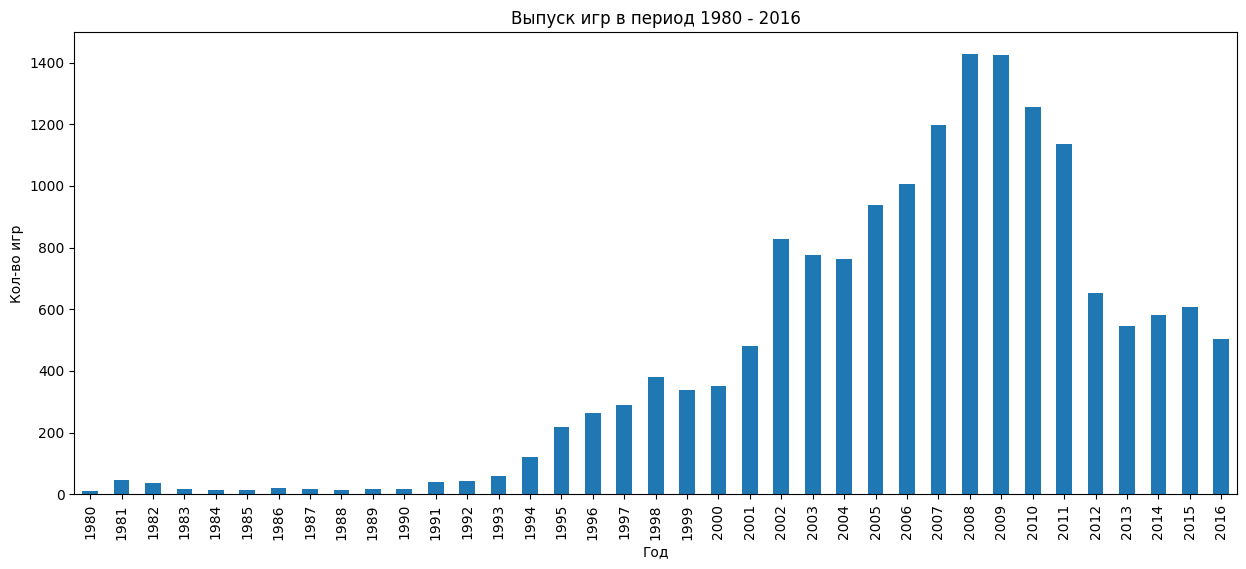

In [34]:
games.groupby('release_year')['release_year'].count().plot(kind='bar', figsize=(15, 6))
plt.title('Выпуск игр в период 1980 - 2016')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

В 80-е рынок игр только зарождался, а в 90-е бурно развивался. В начале 00-х с выходом консолей шестого поколения  игровых систем (Sony PS2, Microsoft Xbox, Nintendo GameCube и др.) он приобрел современный вид - три основных производителя консолей (и отчасти ПК x86/Windows). Более ранние данные точно можно не использовать в исследовании.

### Изменение продаж по платформам по годам

In [35]:
games_by_platform = games.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
).sort_values(
    by='total_sales',
    ascending=False
)

games_by_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


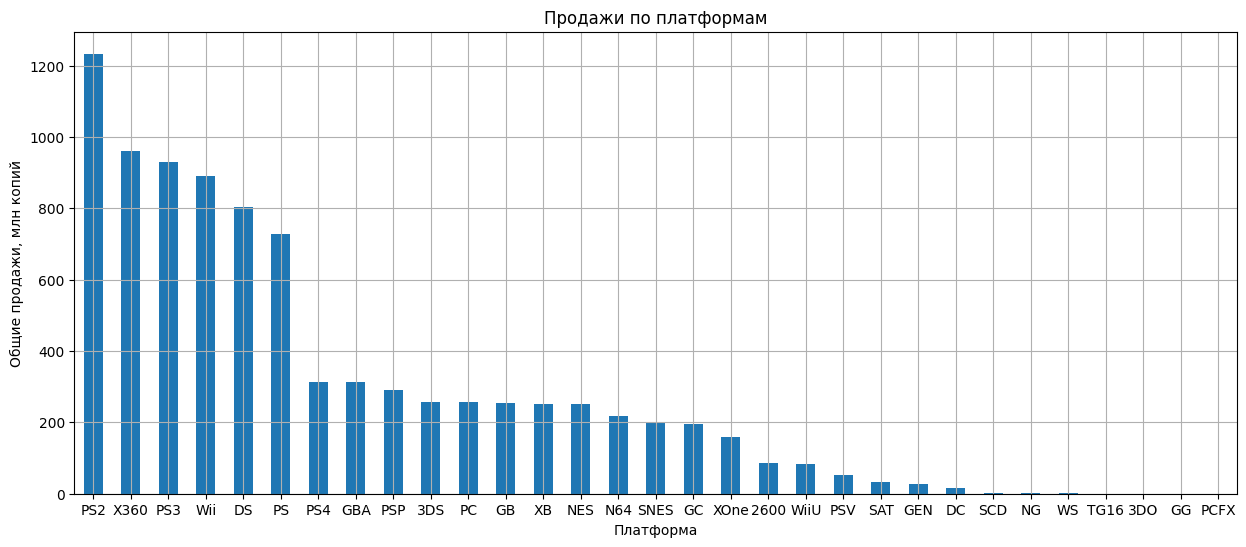

In [36]:
games_by_platform.plot(kind='bar', figsize=(15, 6), legend=False, grid=True)

plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.xticks(rotation=0)
plt.ylabel('Общие продажи, млн копий')

plt.show()

In [37]:
platforms = games_by_platform.index
len(platforms)

31

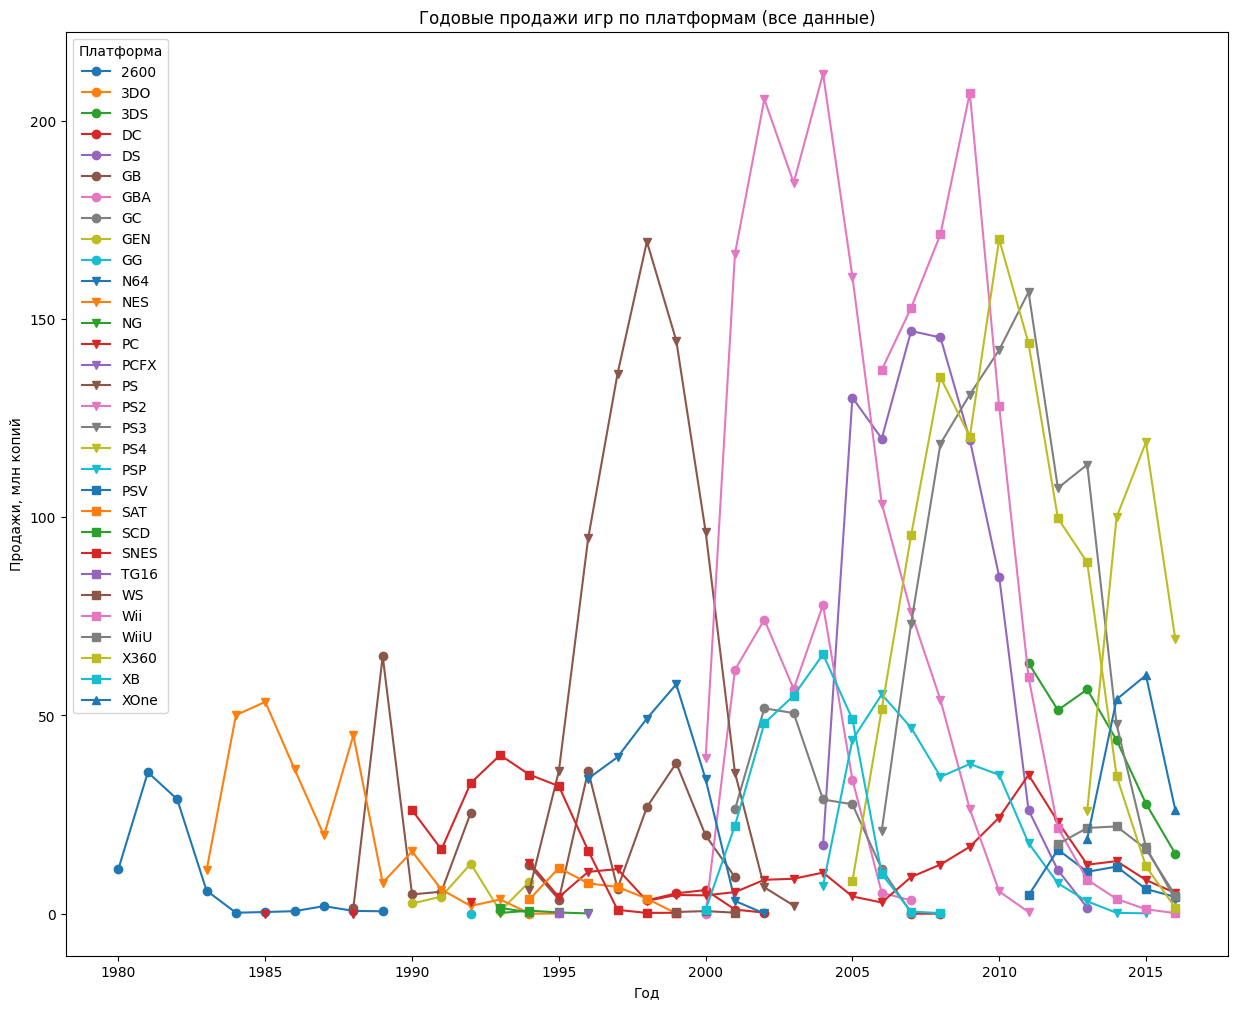

In [38]:
games_by_year_n_platform = games.pivot_table(
    index='release_year',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

style = ['o-'] * 10 + ['v-'] * 10 + ['s-'] * 10 + ['^-'] * 10

games_by_year_n_platform.plot(style=style, figsize=(15, 12))

plt.title('Годовые продажи игр по платформам (все данные)')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.legend(title='Платформа')

plt.show()

Сложно что-то рассмотреть - сделаем группы по 10 из топа по суммарным продажам 

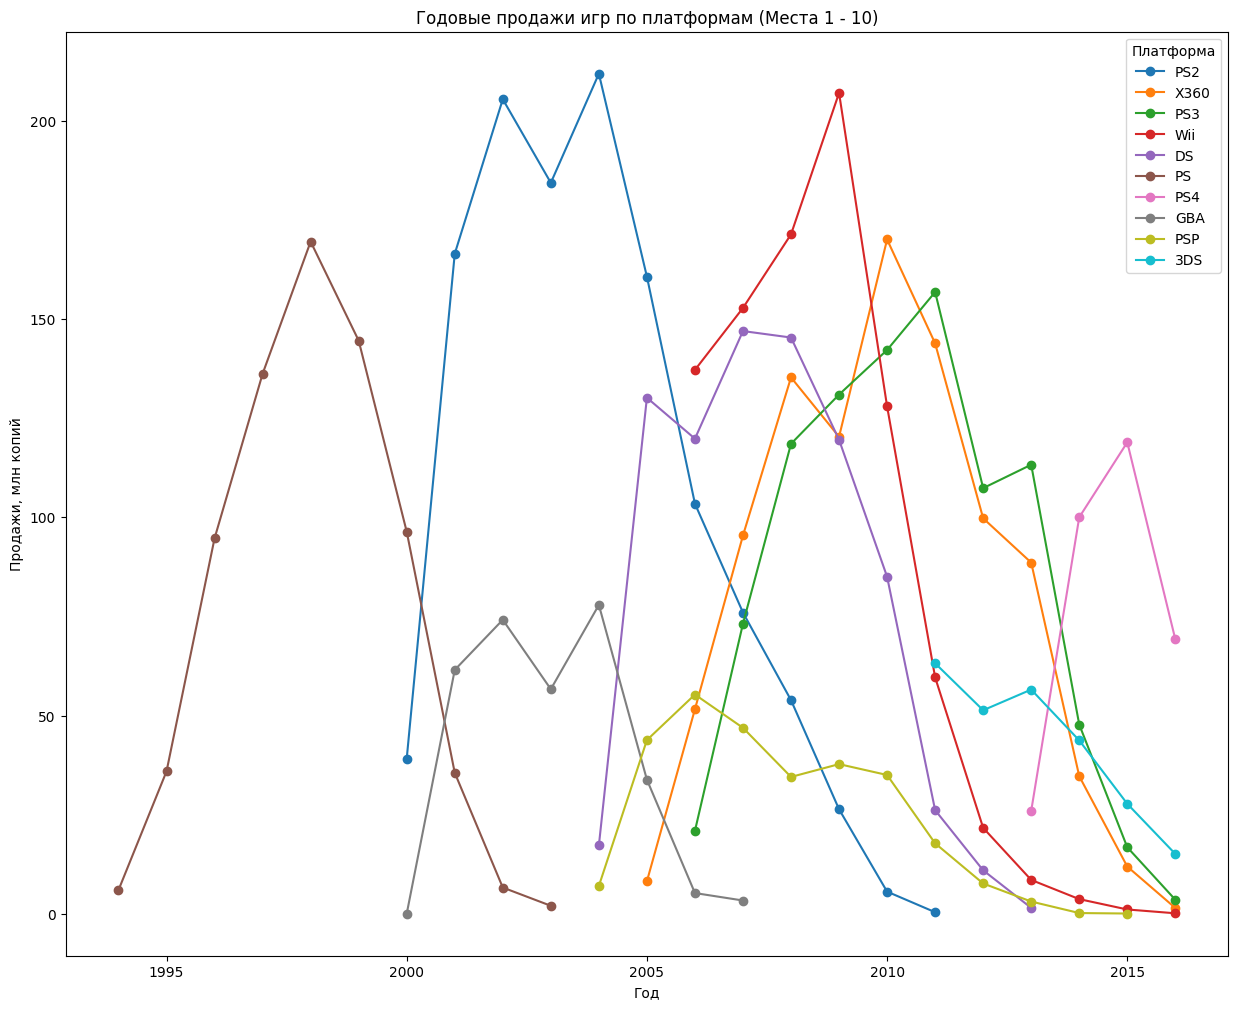

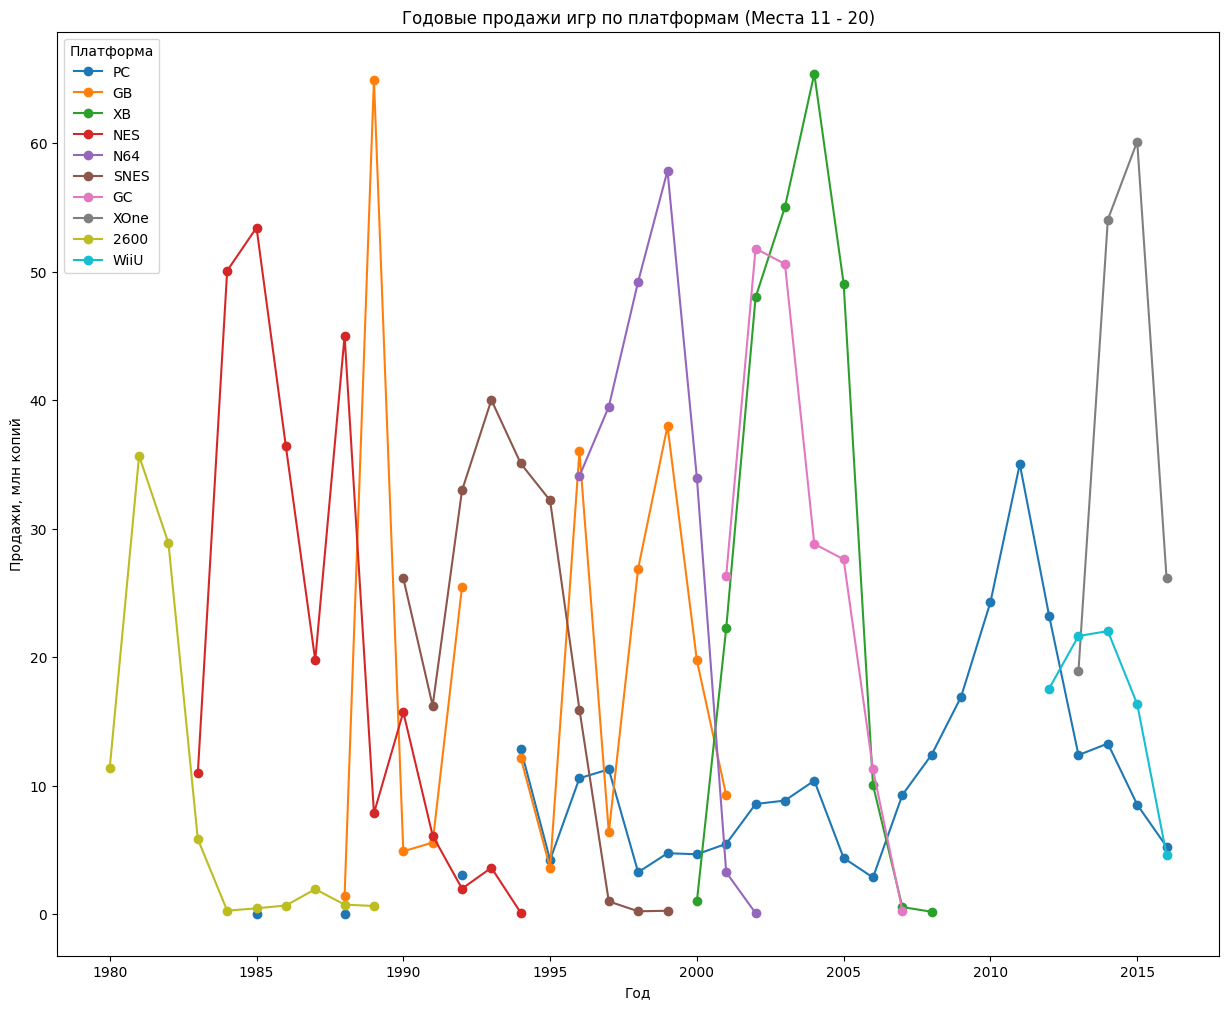

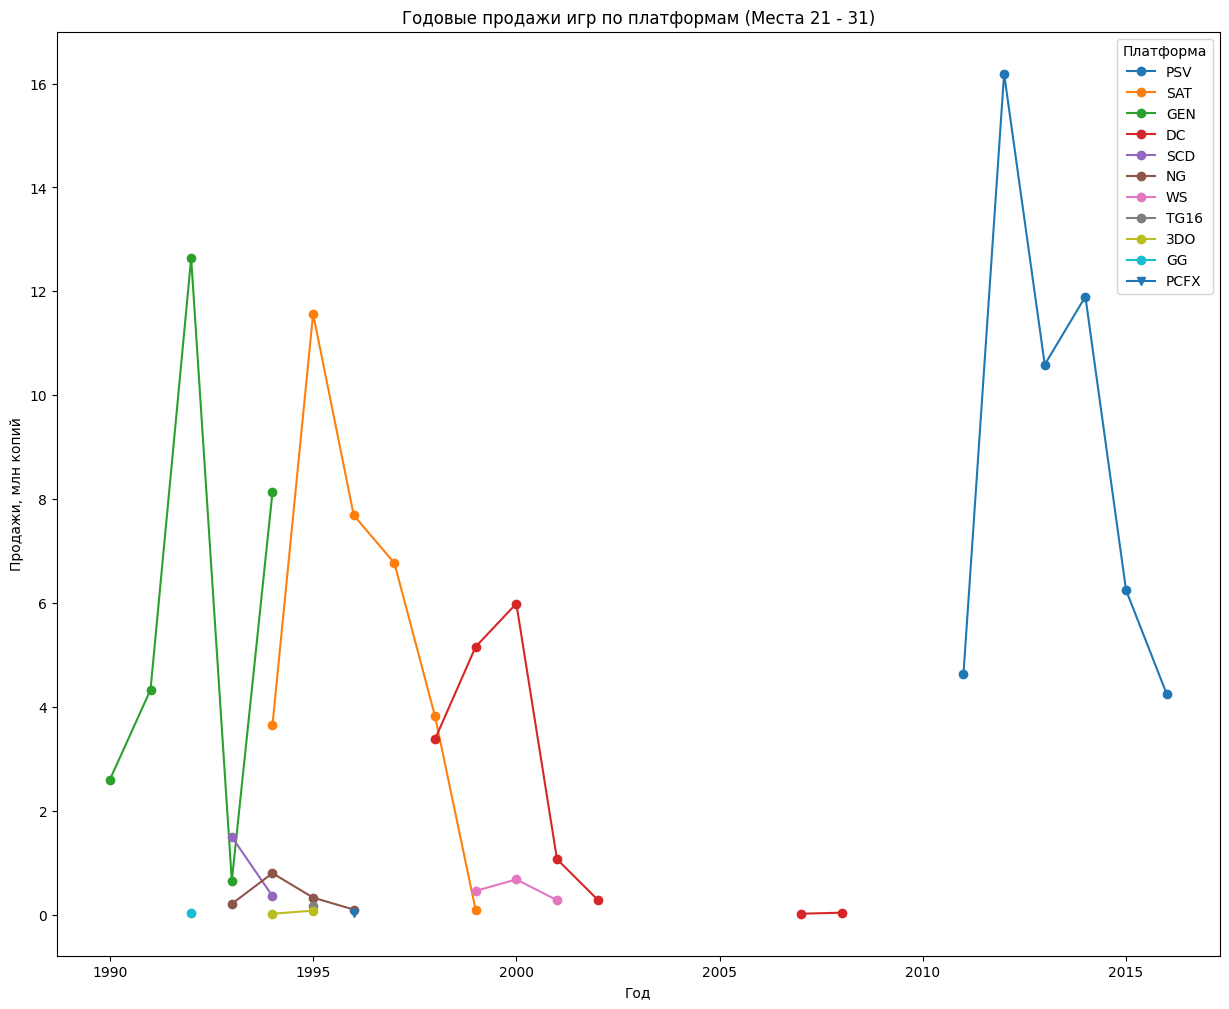

In [39]:
ranges = [
    [0, 10],
    [10, 20],
    [20, 31]
]

for first, last in ranges:
    
    games_by_year_n_platform[platforms[first: last]].plot(style=style, figsize=(15, 12))

    plt.title(f'Годовые продажи игр по платформам (Места {first + 1} - {last})')
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн копий')
    plt.legend(title='Платформа')

    plt.show()


Топ-10 по суммарным наиболее популярных платформ:
- Sony
    - PS
    - PS2
    - PS3
    - PS4
    - PSP
- Microsoft
    - Xbox 360
- Nintendo
    - Wii
    - GBA
    - DS
    - 3DS

Характерный срок "жизни" популярной платформы, как видно из графиков, составляет 8-10 лет. Другими словами, 6-7 лет на поколение + 2-3 года после релиза производителем новой. Покажем это на примере консолей Sony.

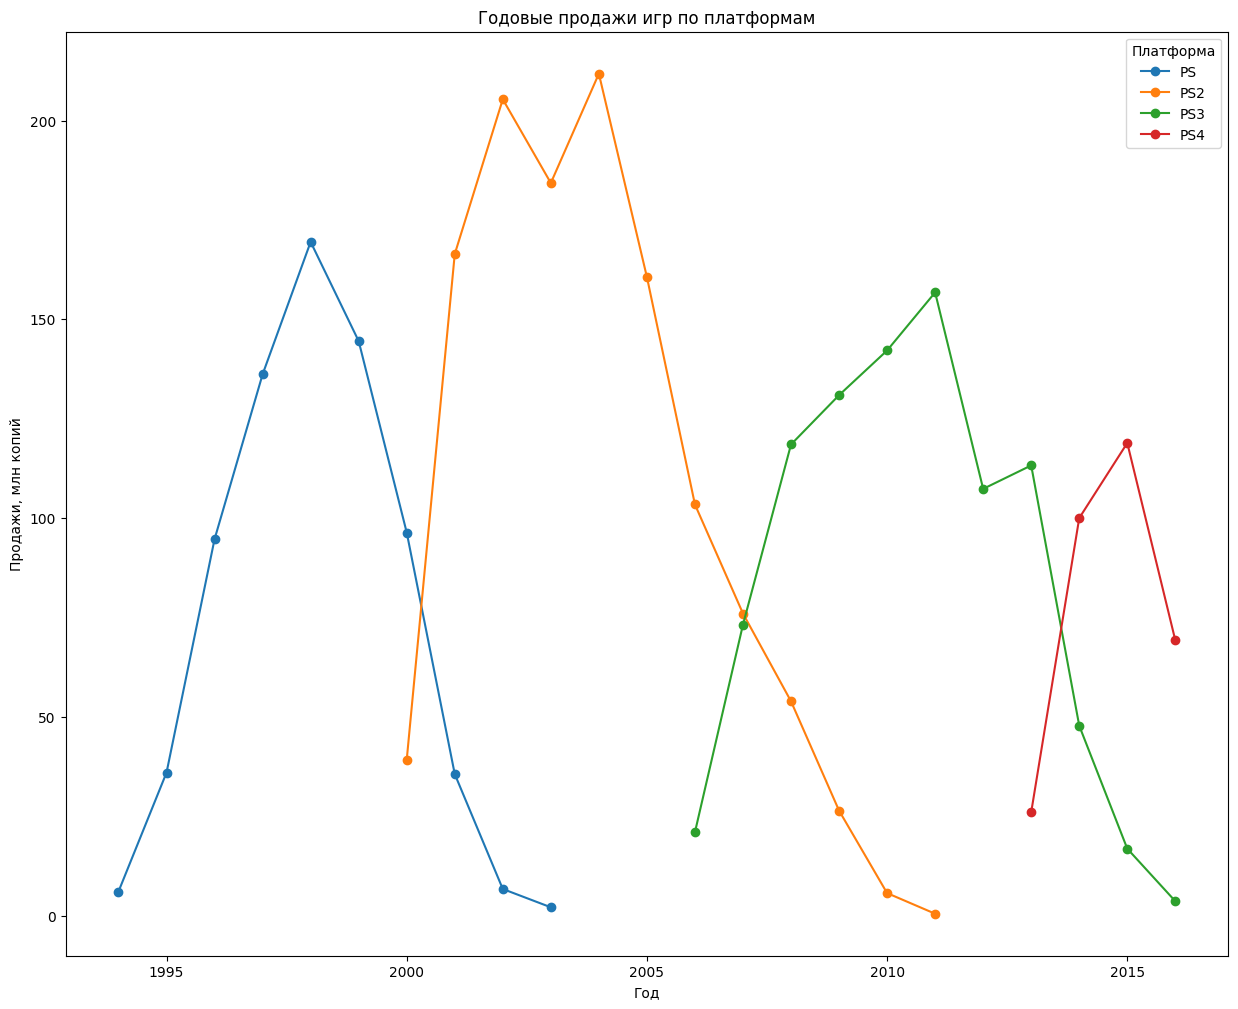

In [40]:
games_by_year_n_platform[['PS', 'PS2', 'PS3', 'PS4']].plot(style=style, figsize=(15, 12))

plt.title('Годовые продажи игр по платформам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.legend(title='Платформа')

plt.show()

### Фильтрация данных по годам

Похоже, для исследования актульны данные масимум за последние 10 лет. 
Однако, такой интервал может привести к значимомму вкладу в данные от уже не поддреживаемых платформ - можно "зацепить" сразу 3 поколения.
Поэтому отфильтруем данные за 4 года (2013-2016) - нижняя граница одного поколения и примерно половина жизненного цикла платформы.

In [41]:
games_filtered = games.query('release_year >= 2013')

In [42]:
games_by_year_n_platform_filtered = games_by_year_n_platform.query('release_year >= 2013').dropna(axis=1, how='all')

### Актуальные платформы

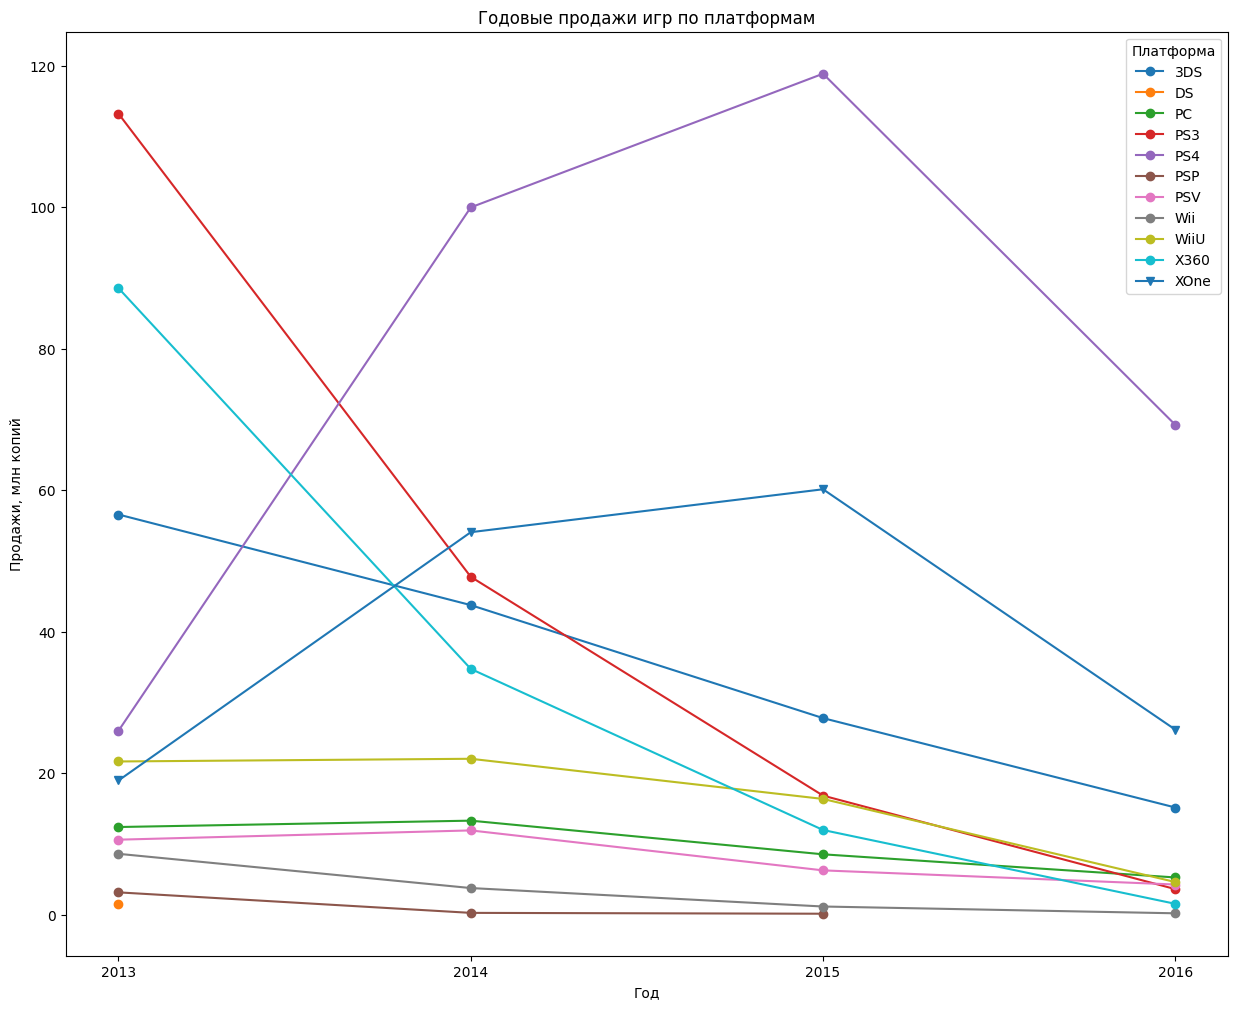

In [43]:
games_by_year_n_platform_filtered.plot(style=style, figsize=(15, 12))

plt.title('Годовые продажи игр по платформам')
plt.xlabel('Год')
plt.xticks(range(2013, 2017))
plt.ylabel('Продажи, млн копий')
plt.legend(title='Платформа')

plt.show()

На момент 2016 года основными можно считать:
- PS4 (лидер рынка)
- Xbox One
- 3DS (актуальная, но близко конец жизненного цикла)

Догоняющая группа:
- Xbox 360 (самый конец жизненного цикла)
- PS3 (самый конец жизненного цикла)
- WiiU (актуальная, но не очень популярная платформа)
- PS Vita (актуальная, но не очень популярная платформа + близко конец жизненного цикла)
- ПК (актуальная, но не очень популярная платформа + большая доля продаж приходится на "цифру" напрямую от издателя в Steam и других платформах цифровой дистрибуции)


У PS4 и Xbox One была просадка продаж в 2016 году, но эта тенденция не должна продолжиться - только 3 года от релиза платформ.
От догоняющей группы ждать роста едва ли стоит.
Остальные - уже история.

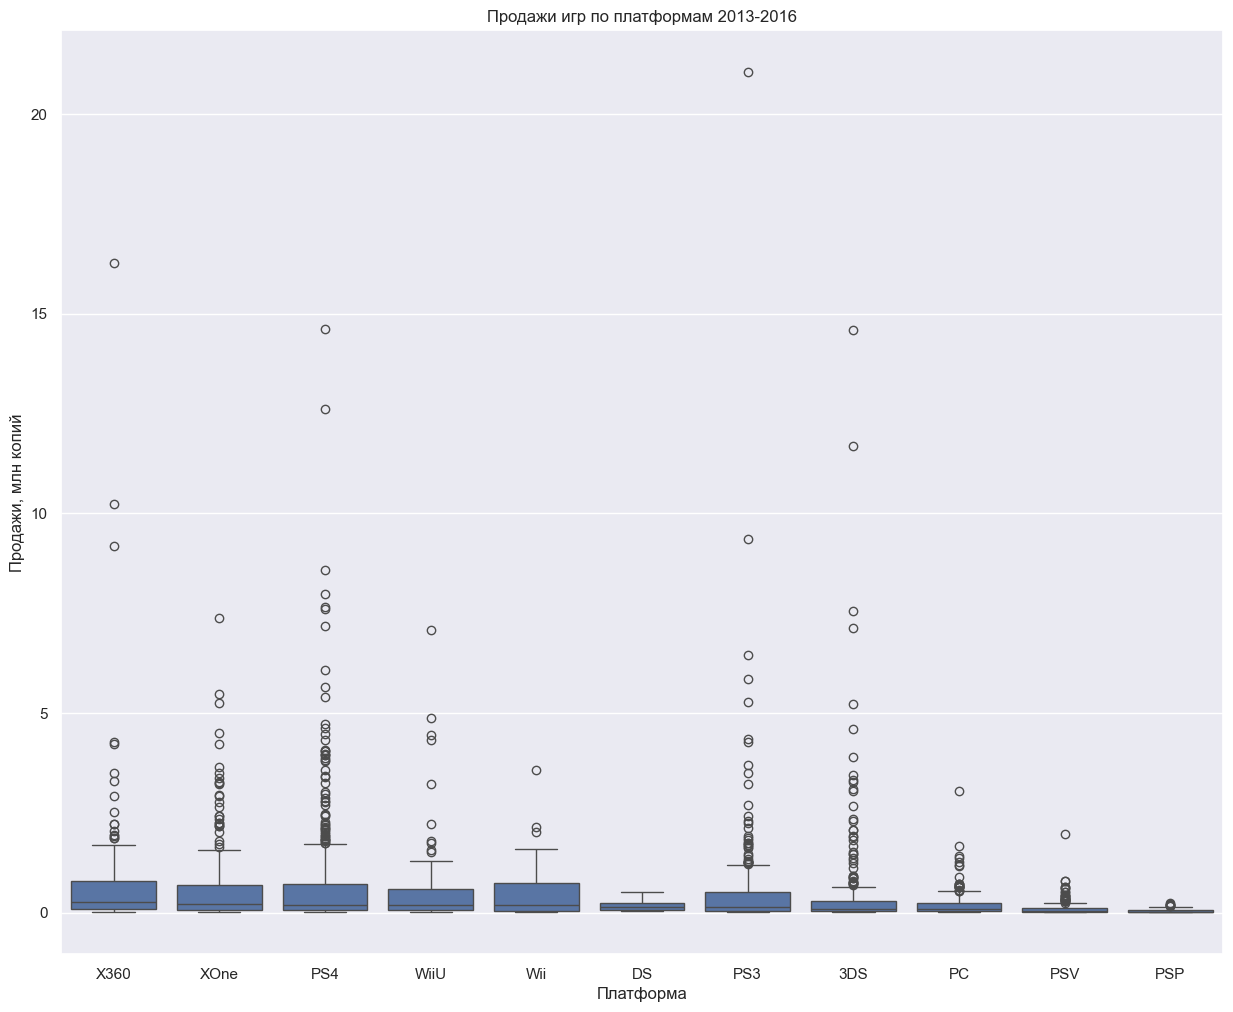

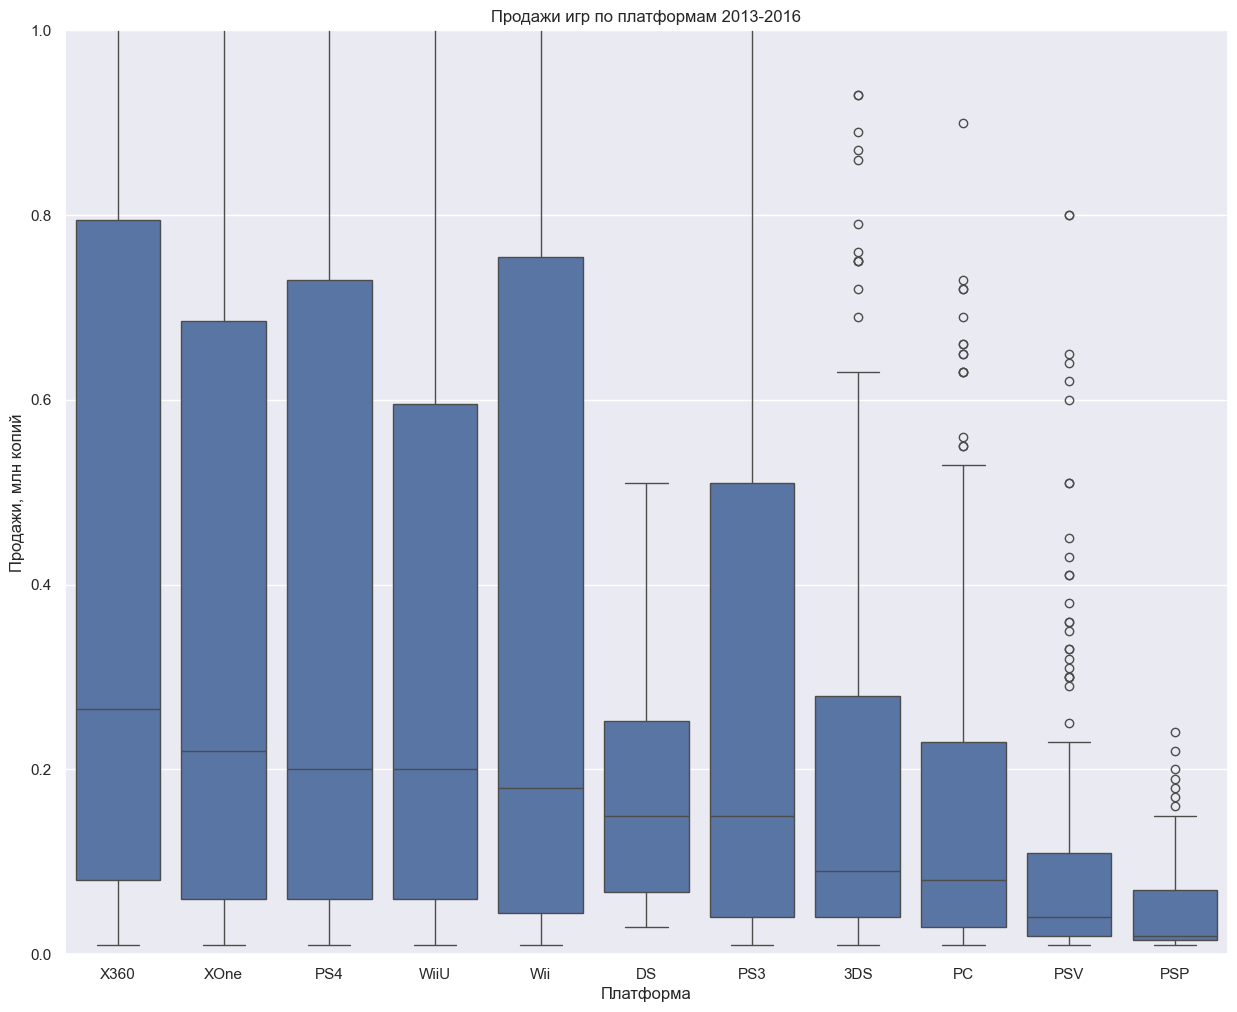

In [44]:
platfom_order = games_filtered.groupby('platform')['total_sales'].median().sort_values(ascending=False)

for ylim in [None, (0, 1)]:

    sns.set(rc = {'figure.figsize':(15, 12)})
    sns.boxplot(
        data=games_filtered,
        x='platform',
        y='total_sales',
        order=platfom_order.index
    )
    
    plt.title('Продажи игр по платформам 2013-2016')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, млн копий')
    
    if ylim:
        plt.ylim(ylim)

    plt.show()

plt.style.use('default') # бьём seaborn по рукам за изменение дефолтного стиля

Если смотреть на данные так, то лидером можно назвать Xbox 360. Но посмотрев на тенденцию продаж игр в 2013-2016 и год выхода консоли (2005), ему точно можно снижать приоритет.
Далее группа из 4 - Xbox One, PS4, WiiU и Wii. Первые три - актуальное на тот момент 7 поколение, а Wii - ветеран 2005 года выпуска с такой же, как и у Xbox 360, тенденцией.
Далее опять ветераны - DS и PS3.

Таким образом, большие продажи и тенденция к росту (хотя бы потенциальная) есть у Xbox One, PS4 и WiiU.
(Включение последней сейчас уже выглядит забавно в контексте того, что Nintendo её досрочно отправила на пенсию после выхода Switch)

### Влияние отзывов пользователей и критиков на продажи

Рассмотрим на примере PS4

In [45]:
games_ps4 = games_filtered.query('platform == "PS4"')

In [46]:
games_ps4[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


Между оценкой от пользователей и продажами коррелляция практически отсутствует, между оценкой от критиков и продажами коррелляция слабая  положительная. Посмотрим на графики.

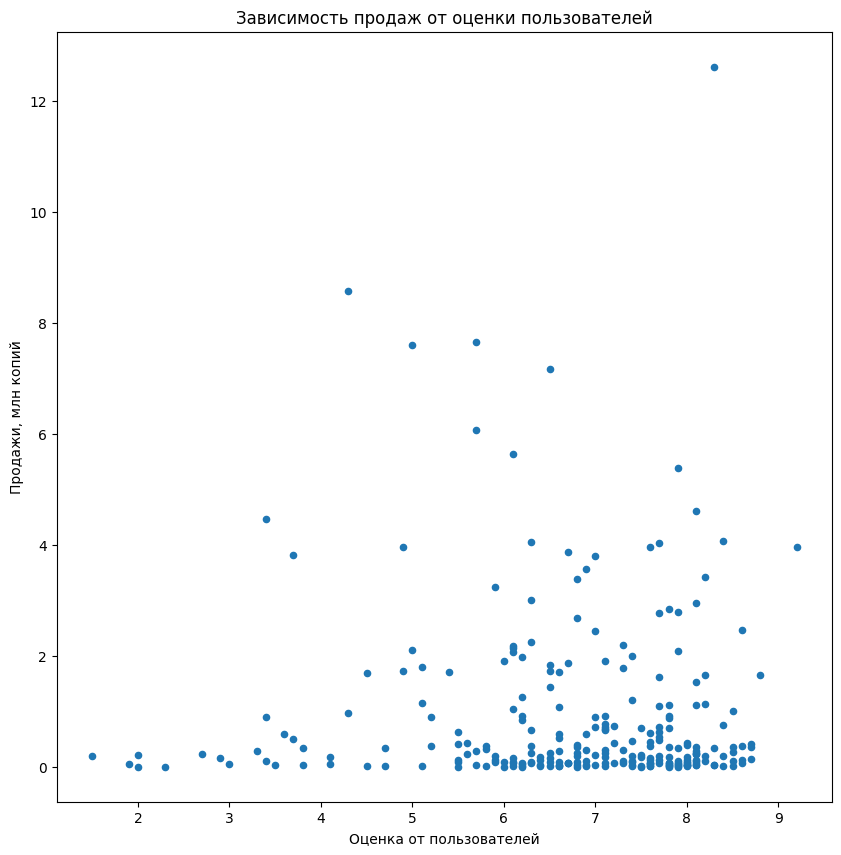

In [47]:
games_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 10))

plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('Оценка от пользователей')
plt.ylabel('Продажи, млн копий')

plt.show()

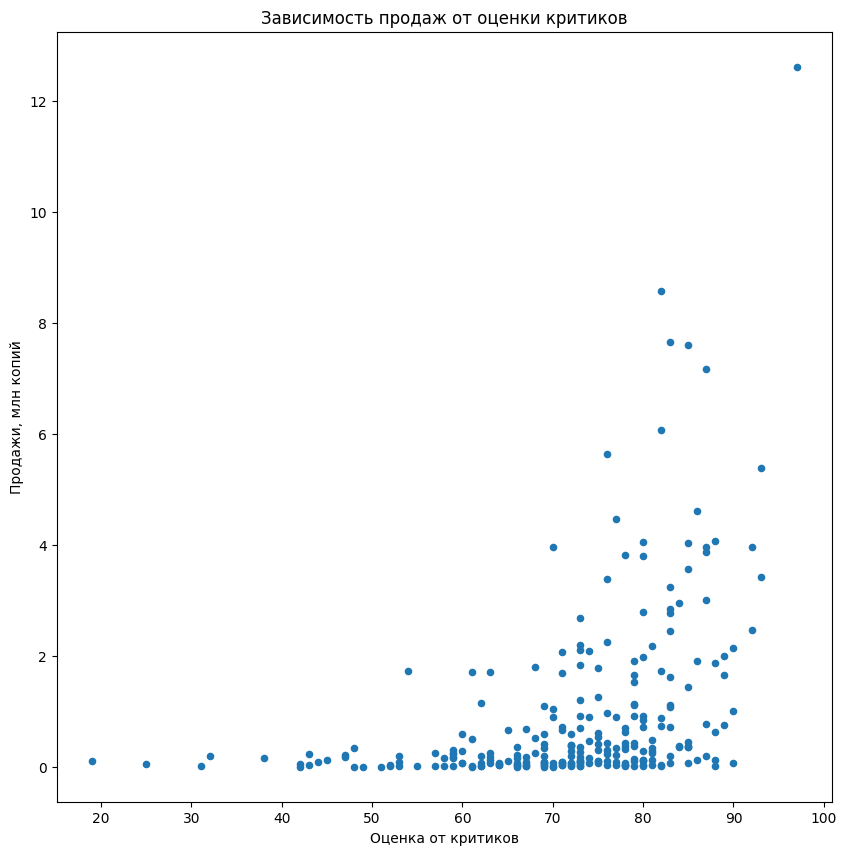

In [48]:
games_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 10))

plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Оценка от критиков')
plt.ylabel('Продажи, млн копий')

plt.show()

Можно сказать, оценка от пользователей и продажи практически не связаны.
Оценка от критиков положительно влияет на продажи, но не слишком сильно.
Стоит, однако, отметить, что коммерчески успешных игр с низкой оценкой от критиков очень мало. 

Посмотрим на остальные четыре наиболее поплуярные платформы за период 2013 - 2016

=== XOne ===


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


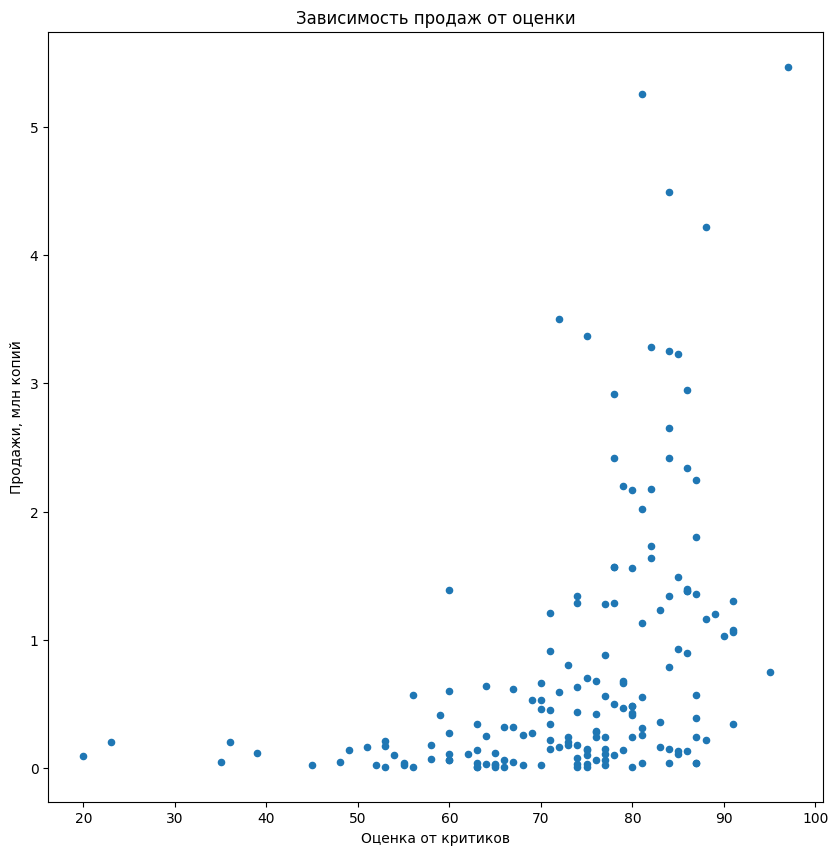

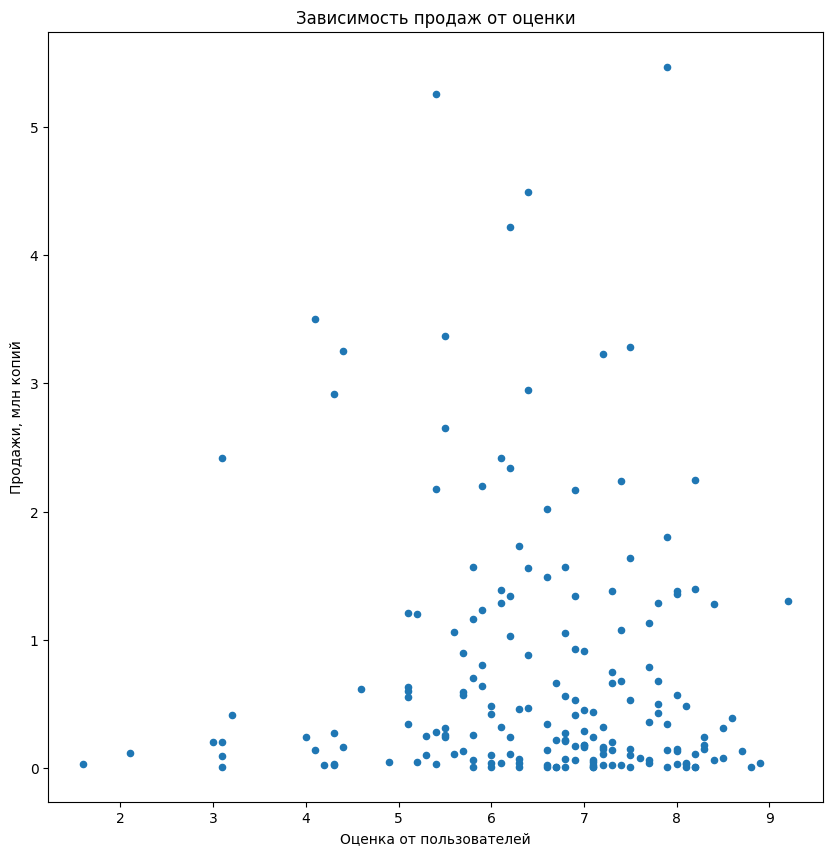


=== WiiU ===


,critic_score,user_score,total_sales
critic_score,1.000000,0.721313,0.376415
user_score,0.721313,1.000000,0.419330
total_sales,0.376415,0.419330,1.000000


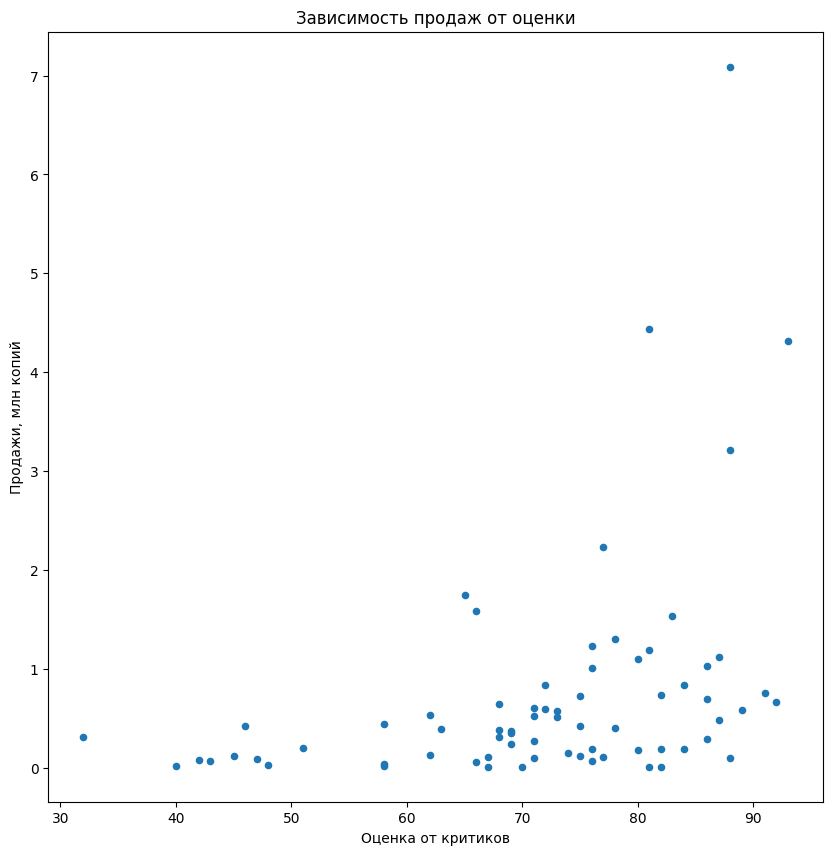

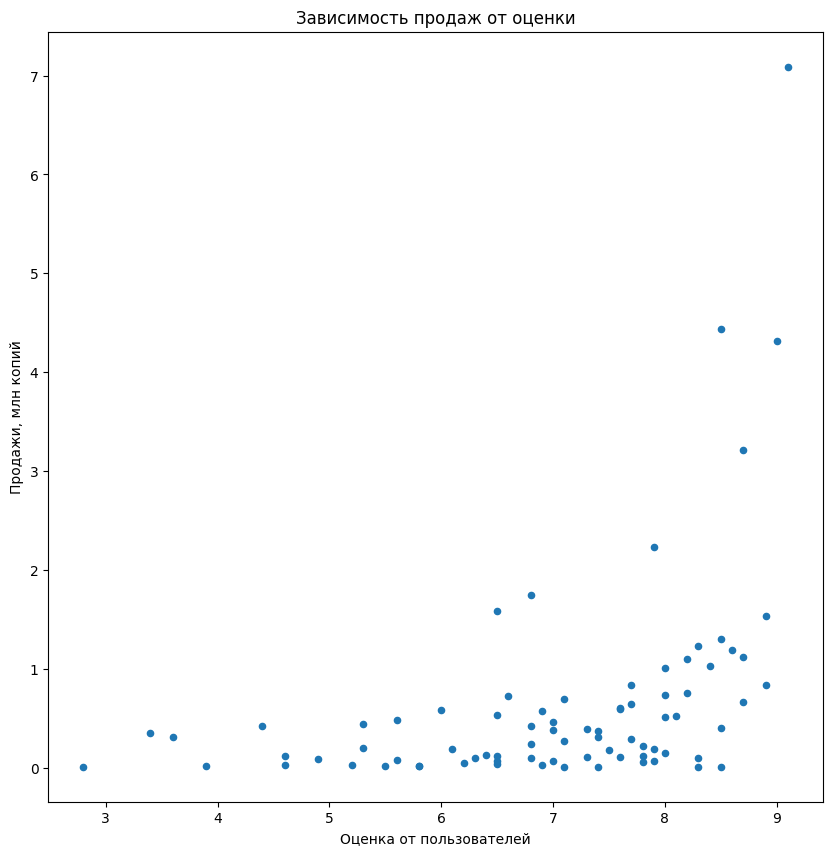


=== PS3 ===


,critic_score,user_score,total_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
total_sales,0.334285,0.002394,1.000000


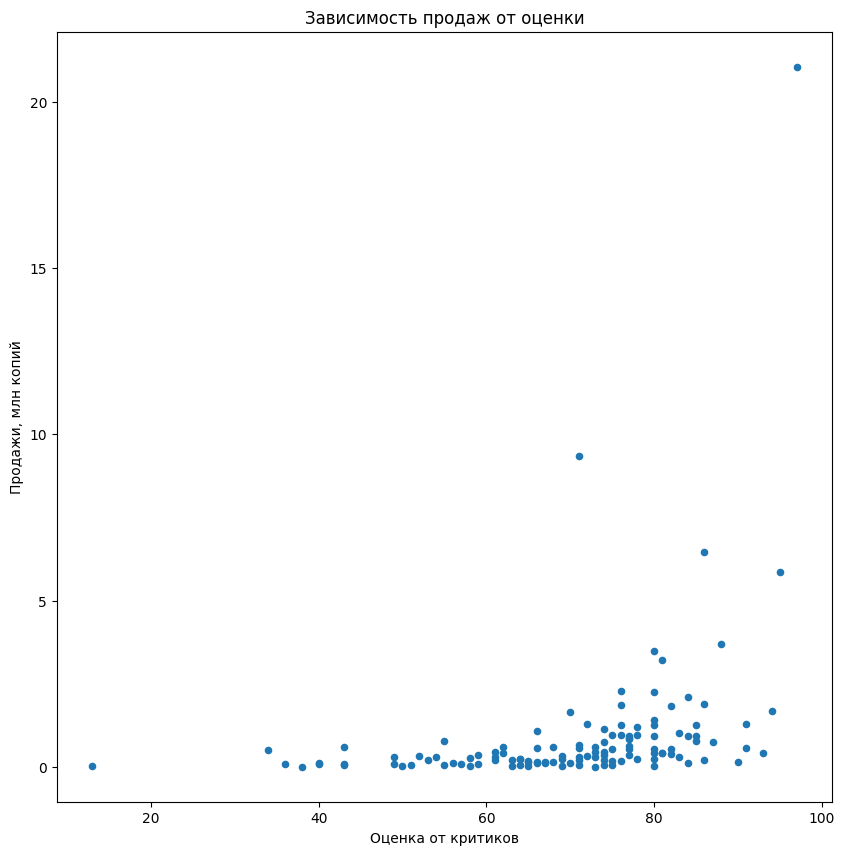

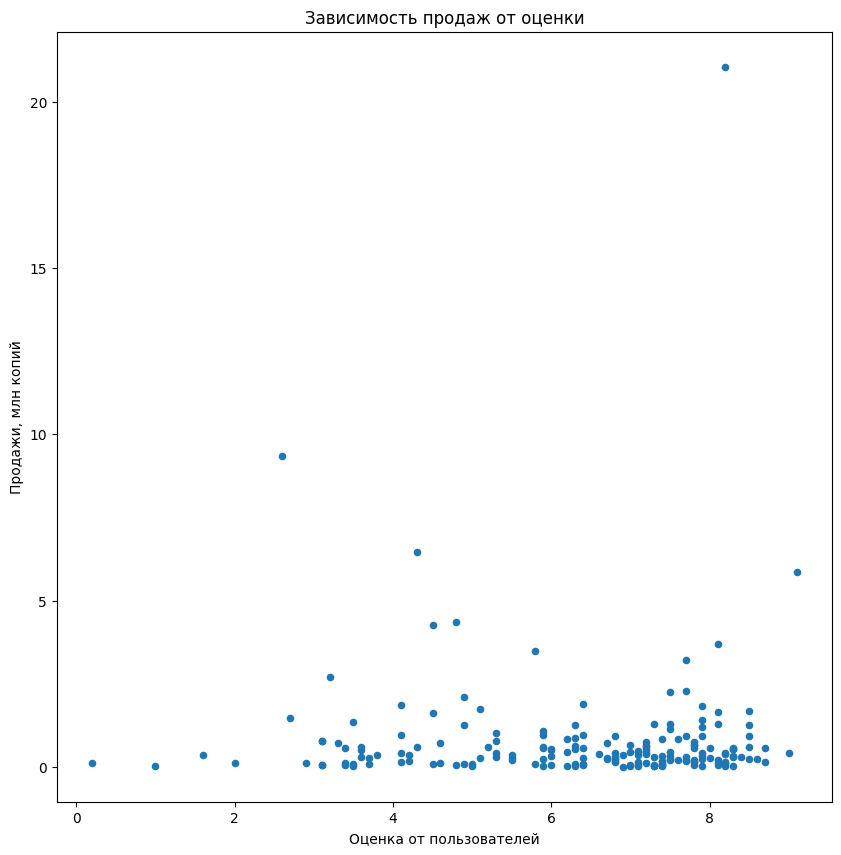


=== X360 ===


,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
total_sales,0.350345,-0.011742,1.000000


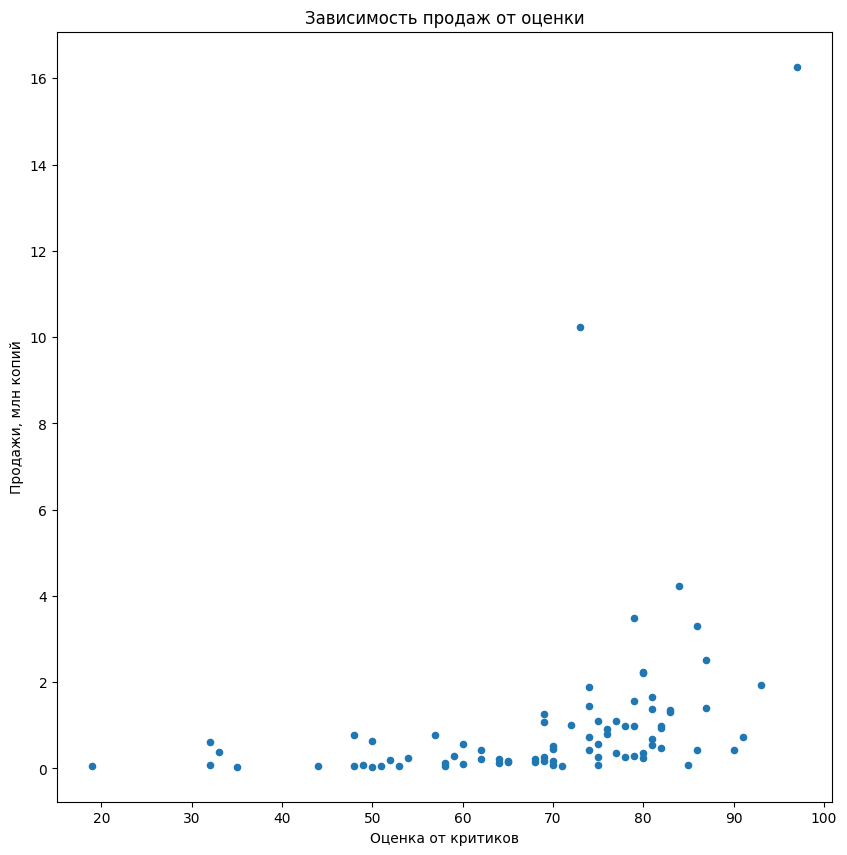

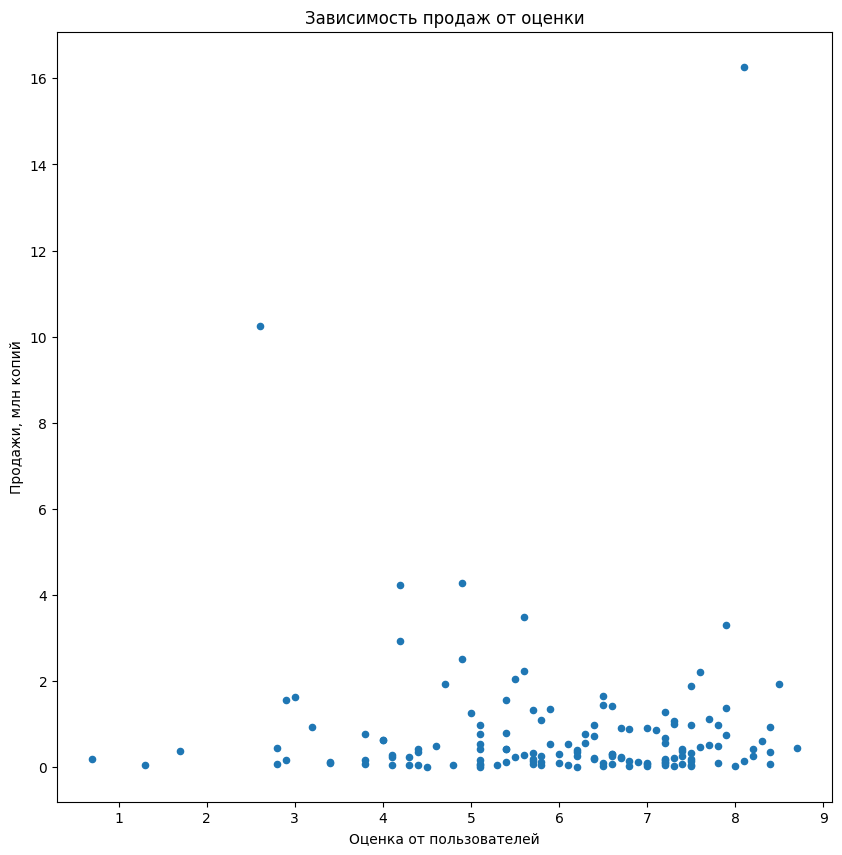


=== Wii ===


,critic_score,user_score,total_sales
critic_score,NaN,NaN,NaN
user_score,NaN,1.000000,0.682942
total_sales,NaN,0.682942,1.000000


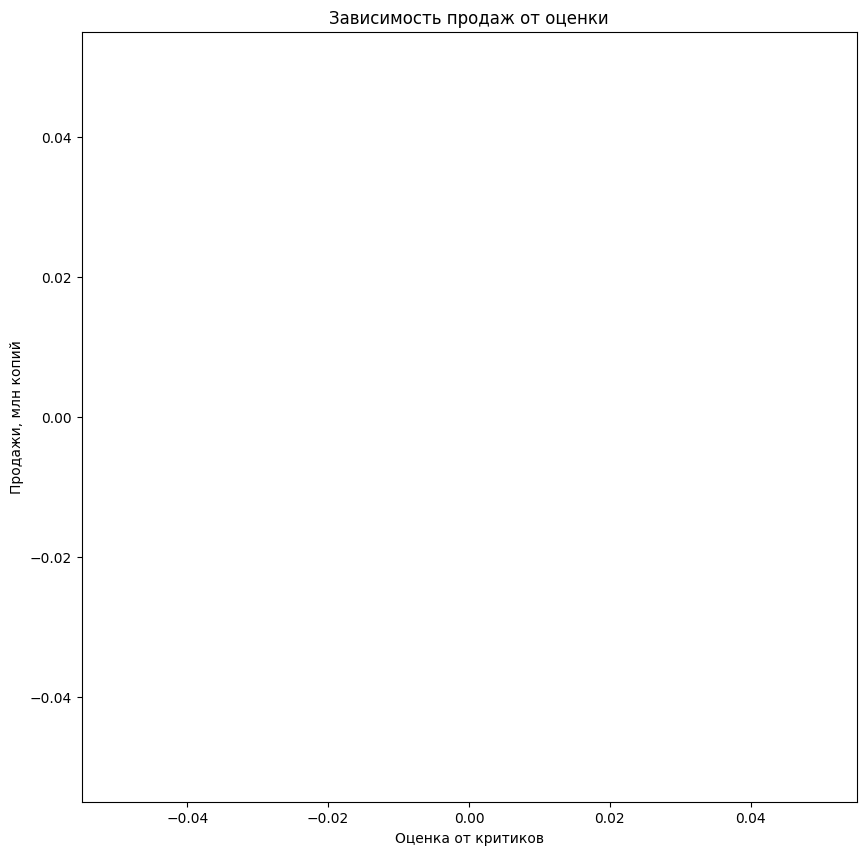

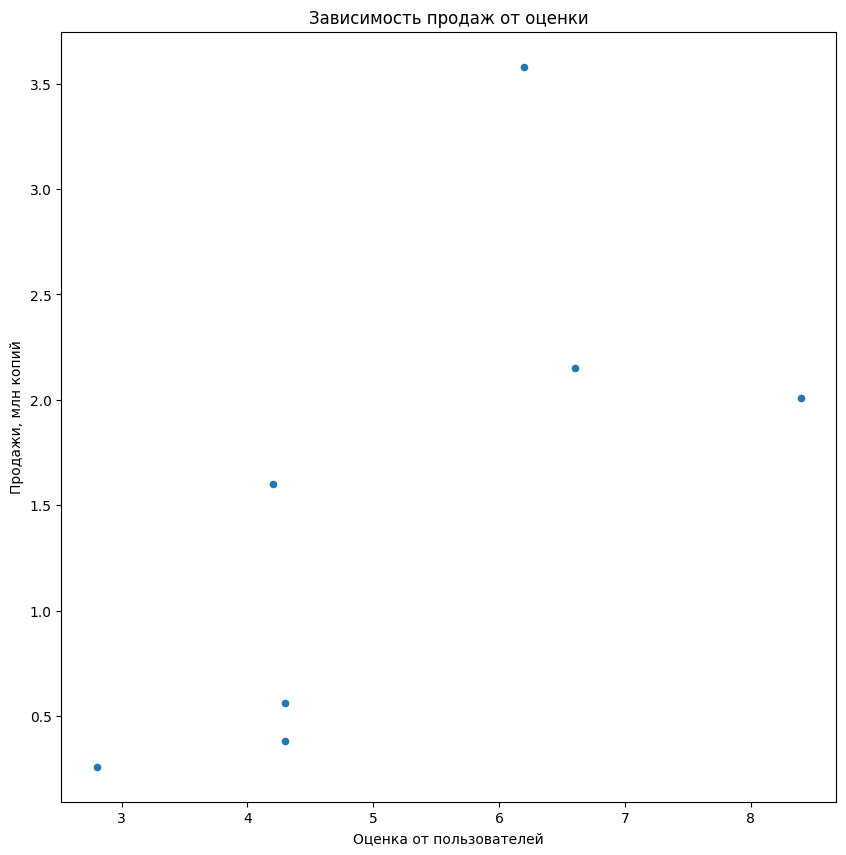

In [49]:
for p in ['XOne', 'WiiU', 'PS3', 'X360', 'Wii']:
    print(f'=== {p} ===')
    tmp = games_filtered.query('platform == @p')
    
    scores = {
        'critic_score': 'Оценка от критиков', 
        'user_score': 'Оценка от пользователей'
    }
    
    display(tmp[list(scores.keys()) + ['total_sales']].corr())
    
    for sc, sc_name in scores.items():
        tmp.plot(kind='scatter', x=sc, y='total_sales', figsize=(10, 10))

        plt.title('Зависимость продаж от оценки')
        plt.xlabel(sc_name)
        plt.ylabel('Продажи, млн копий')

    plt.show()

    print()

PS3 и оба Xbox очень похожи на PS4 (критики влияют, пользователи нет), на WiiU обе оценки влияют идентично, а на Wii за этот период уже нет оценок от критиков, так как платформа уже на пенсии. 

Можно сказать, что картина идентична PS4 с небольшими отклонениями.

### Общее распределение игр по жанрам

In [50]:
games_by_genre = games_filtered.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='sum'
).sort_values(
    by='total_sales',
    ascending=False
)

In [51]:
games_by_genre

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


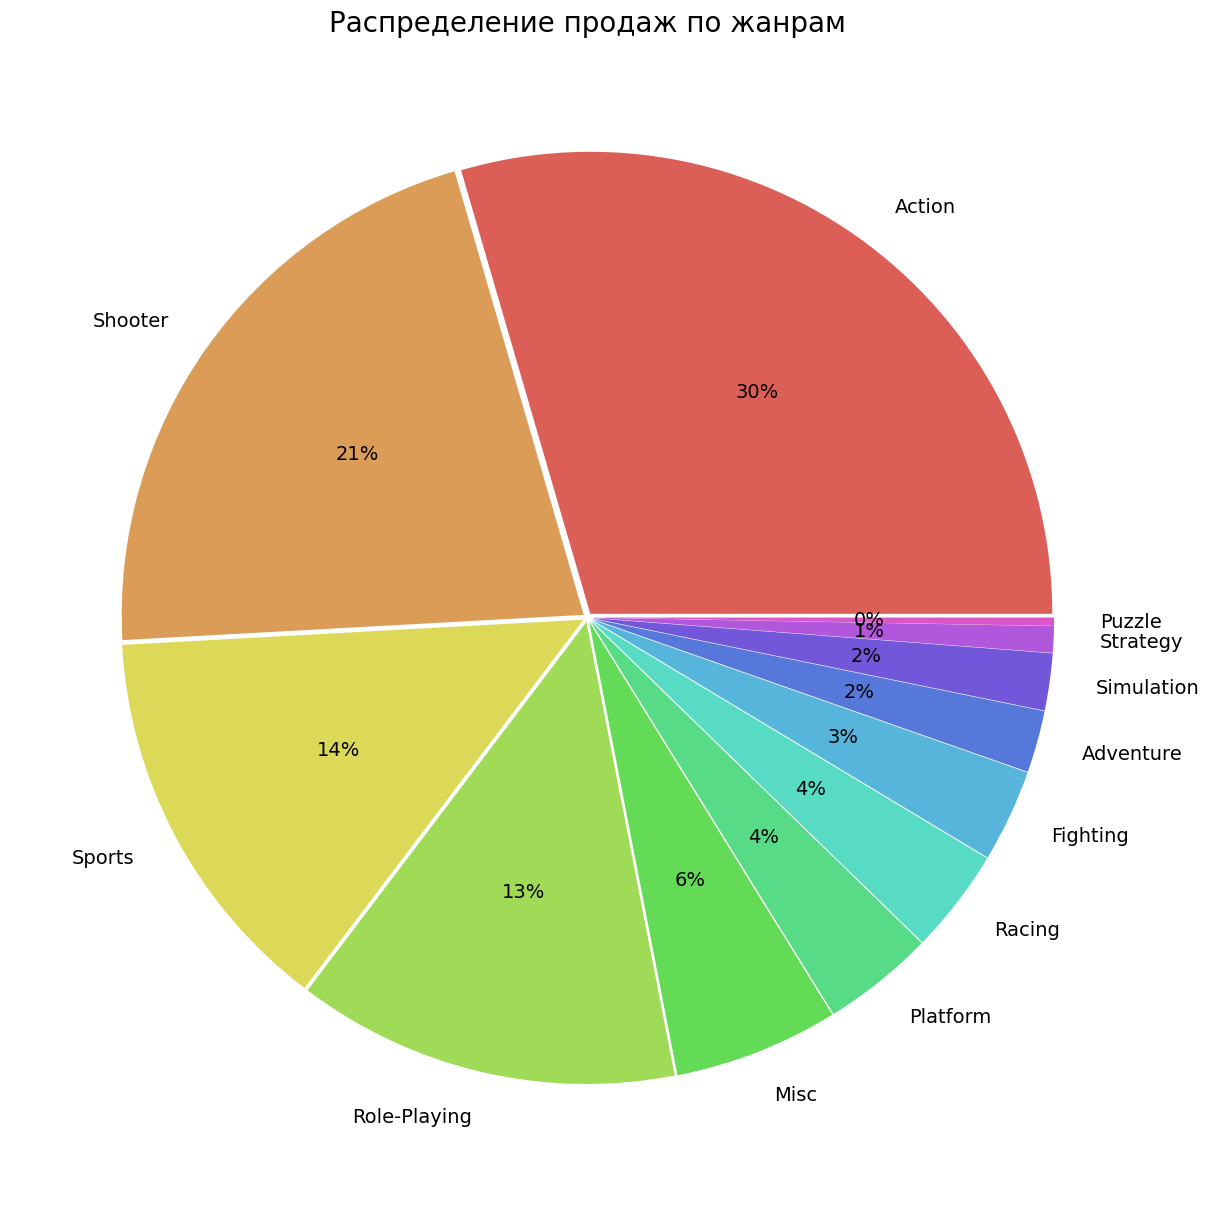

In [52]:
games_by_genre.plot(
    kind='pie',
    y='total_sales',
    figsize=(15, 15),
    autopct='%.0f%%',
    explode=[0.01] * len(games_by_genre),
    colors=sns.color_palette("hls", len(games_by_genre) + 1),
    textprops={'fontsize':14},
    legend=False
)

plt.title('Распределение продаж по жанрам', fontdict={"fontsize":20})
plt.ylabel('')


plt.show()

Почти три четверти продаж приходится на 4 жанра: Action, Shooter, Role-Playing и Sports - назовём их Big 4.
У остальных жанров вклад уже меньше 10%.
Самый малый вклад от жанров с высоким порогом вхождения (Strategy, Simulation, Fighting) или жанров с нестандартным игровым процессом (Adventure и Puzzle).

При этом вклады жанров изменяются достаточно плавно, разделить их можно только на две группы - Big 4 и остальные.

Посмотрим на диаграммами размаха

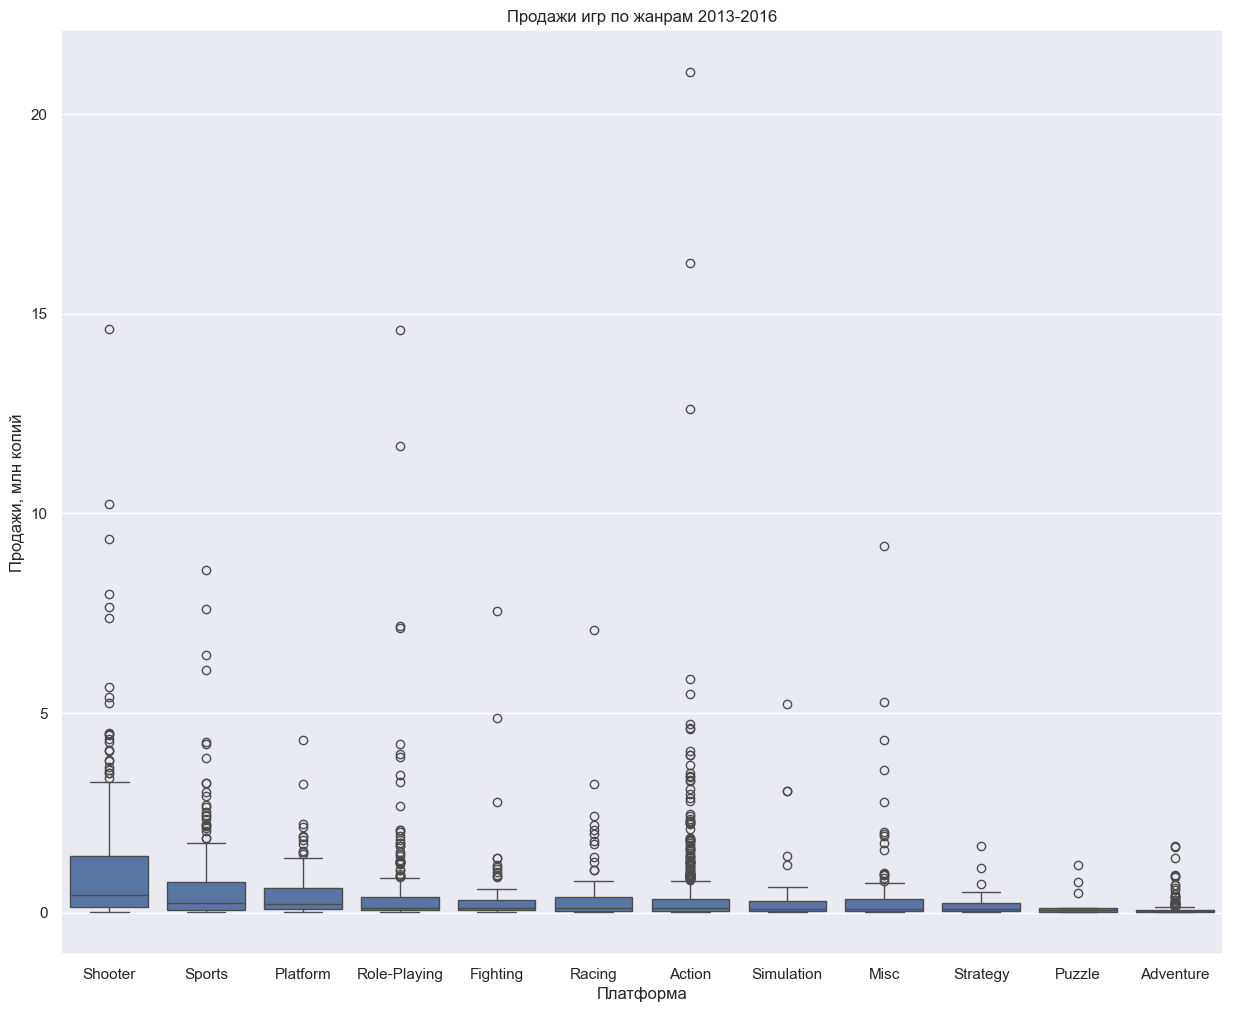

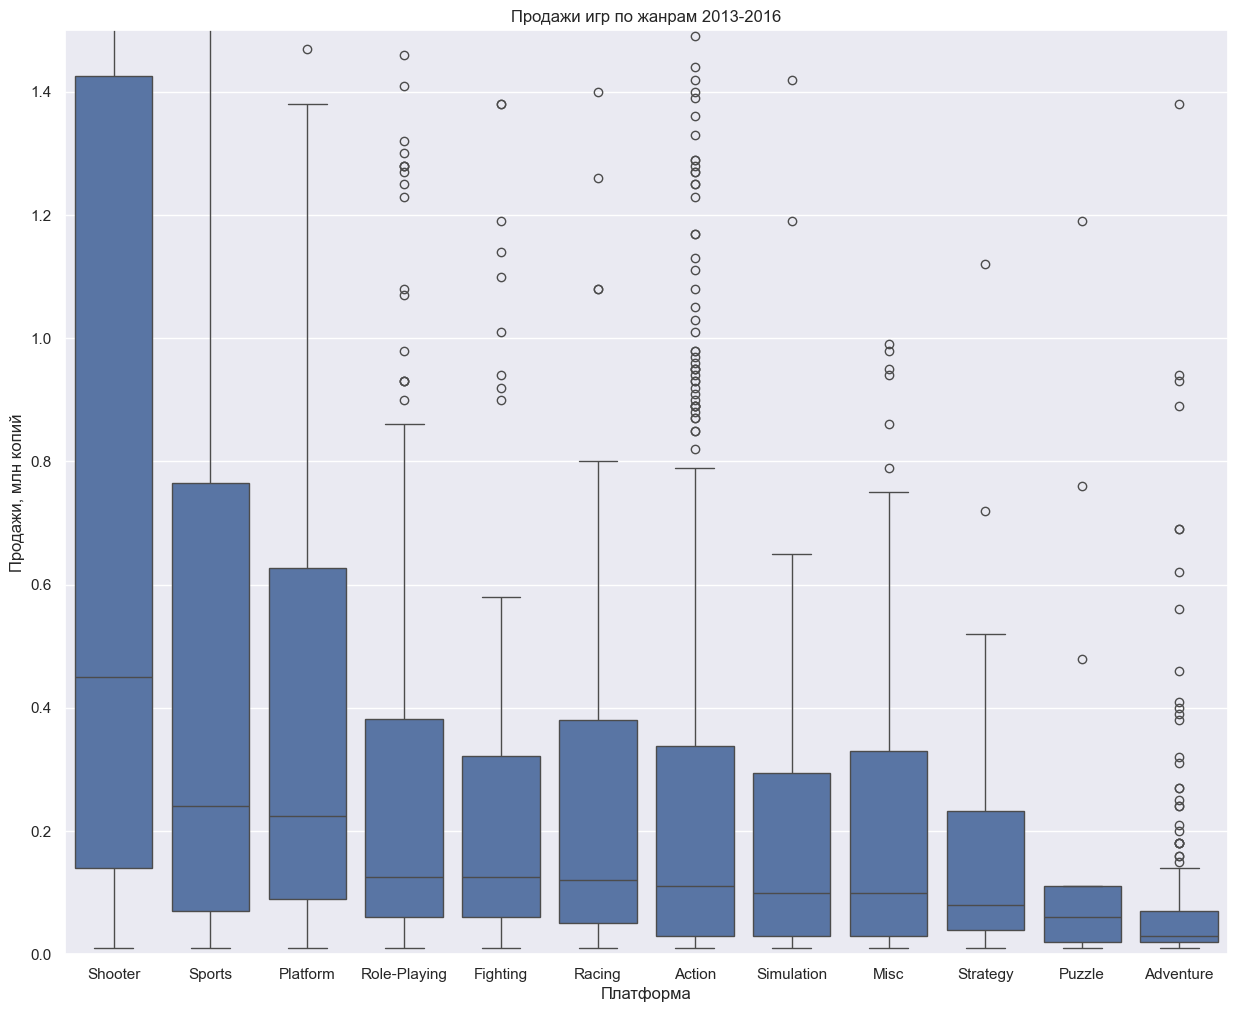

In [53]:
platfom_order = games_filtered.groupby('genre')['total_sales'].median().sort_values(ascending=False)

for ylim in [None, (0, 1.5)]:

    sns.set(rc = {'figure.figsize':(15, 12)})
    sns.boxplot(
        data=games_filtered,
        x='genre',
        y='total_sales',
        order=platfom_order.index
    )
    
    plt.title('Продажи игр по жанрам 2013-2016')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, млн копий')
    
    if ylim:
        plt.ylim(ylim)

    plt.show()

plt.style.use('default')

Похоже, безоговорочным лидером является Shooter. Игры этого жанра как показывают рекордные продажи, так и медианно продаются по 500 000 копий. Неплохо себя чувствуют Sports и Platform - первый и по лучшим представителям, и по медиане, а второй в первую очеедь по медиане. 

### Итог

Вывод по разделу

Анализ рынка за всё время позволяет откинуть данные до 2000, срок жизни платформы - до 7 лет от целевого года, а общие соображения - до 4 лет.

За этот период с учётом динамики можно выбрать актульаные платформы - PS4, Xbox One и WiiU.

Установлено, что высокие оценки критиков положиетльно влияют на продажи, а пользовательские оценки - не влияют.

Среди жанров был найден лидер (Shooter) и пара догоняющих (Sports и Platform).

## Портрет пользователя каждого региона

### Самые популярные платформы

In [54]:
regions = {
    'na': 'Северная Америка', 
    'eu': 'Европа', 
    'jp': 'Япония'
}

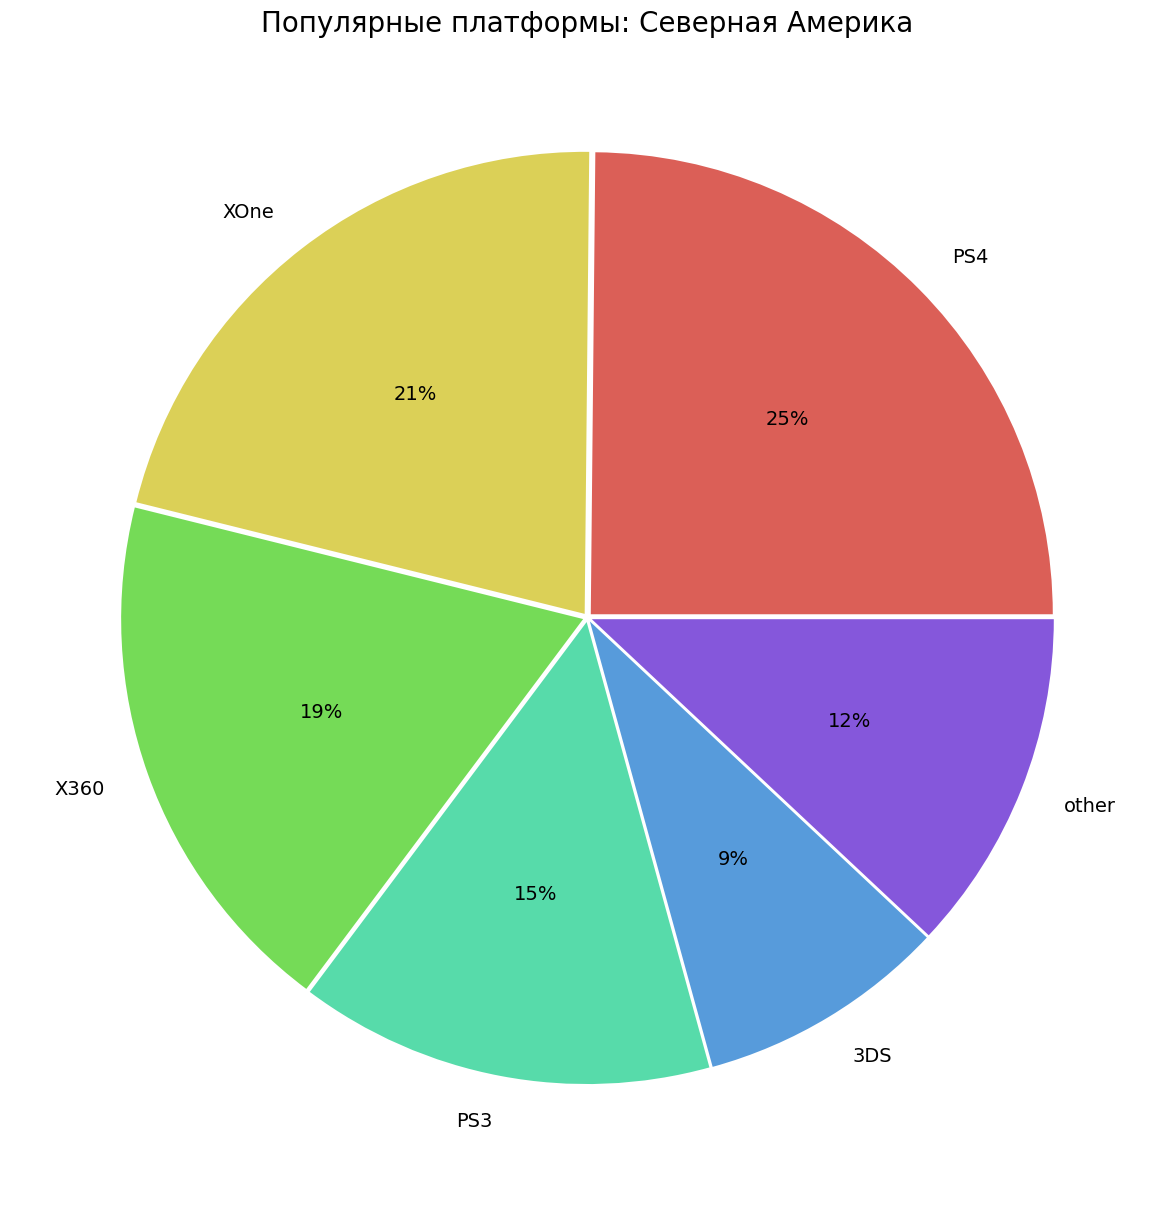

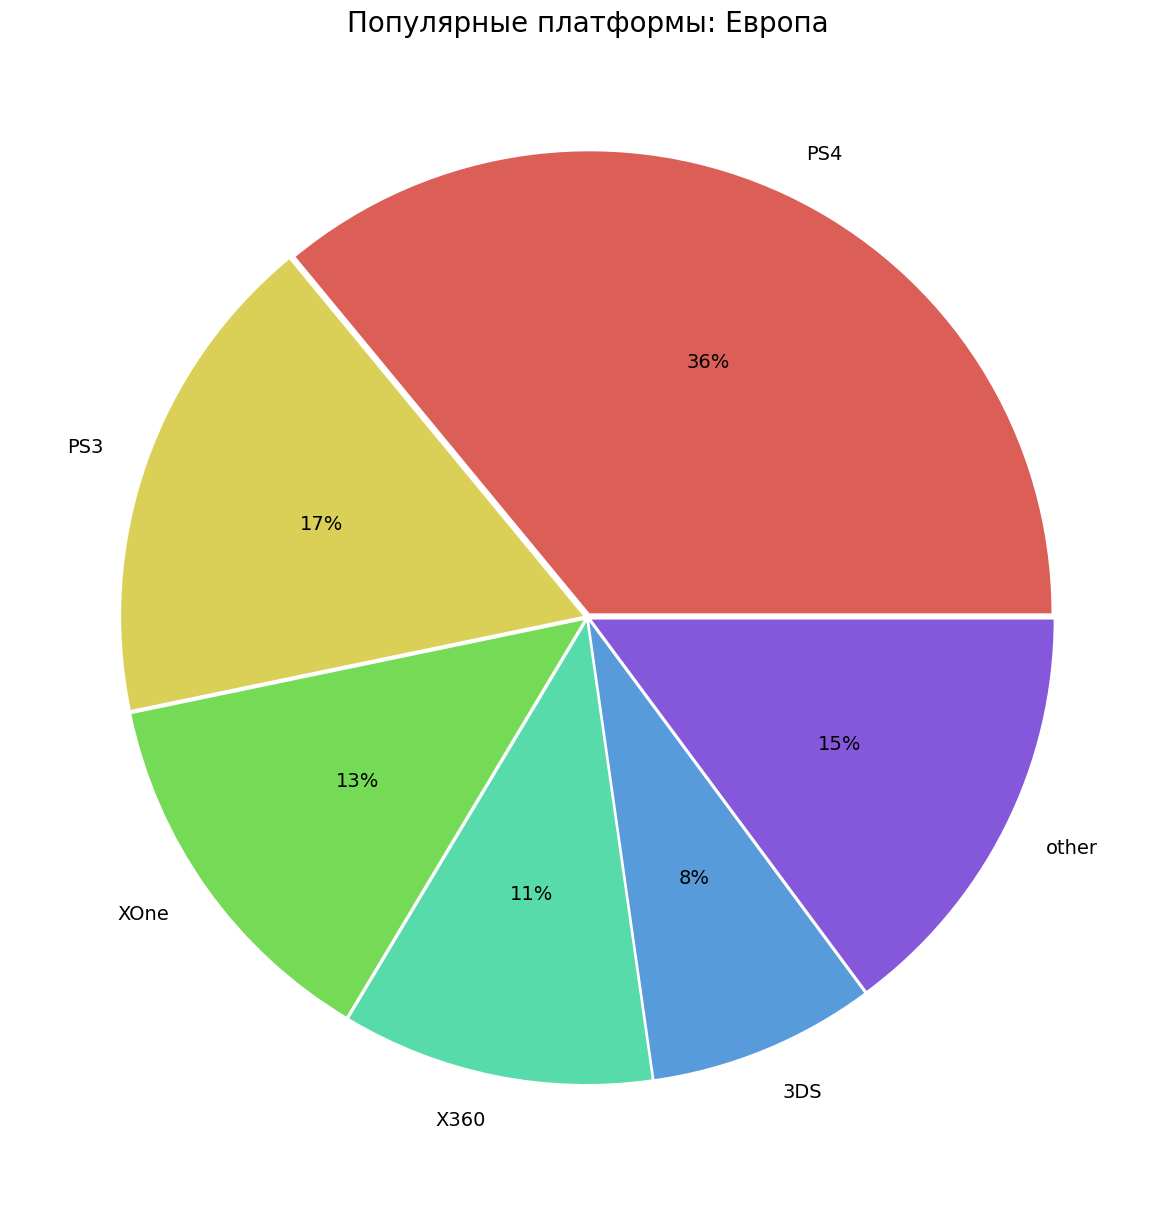

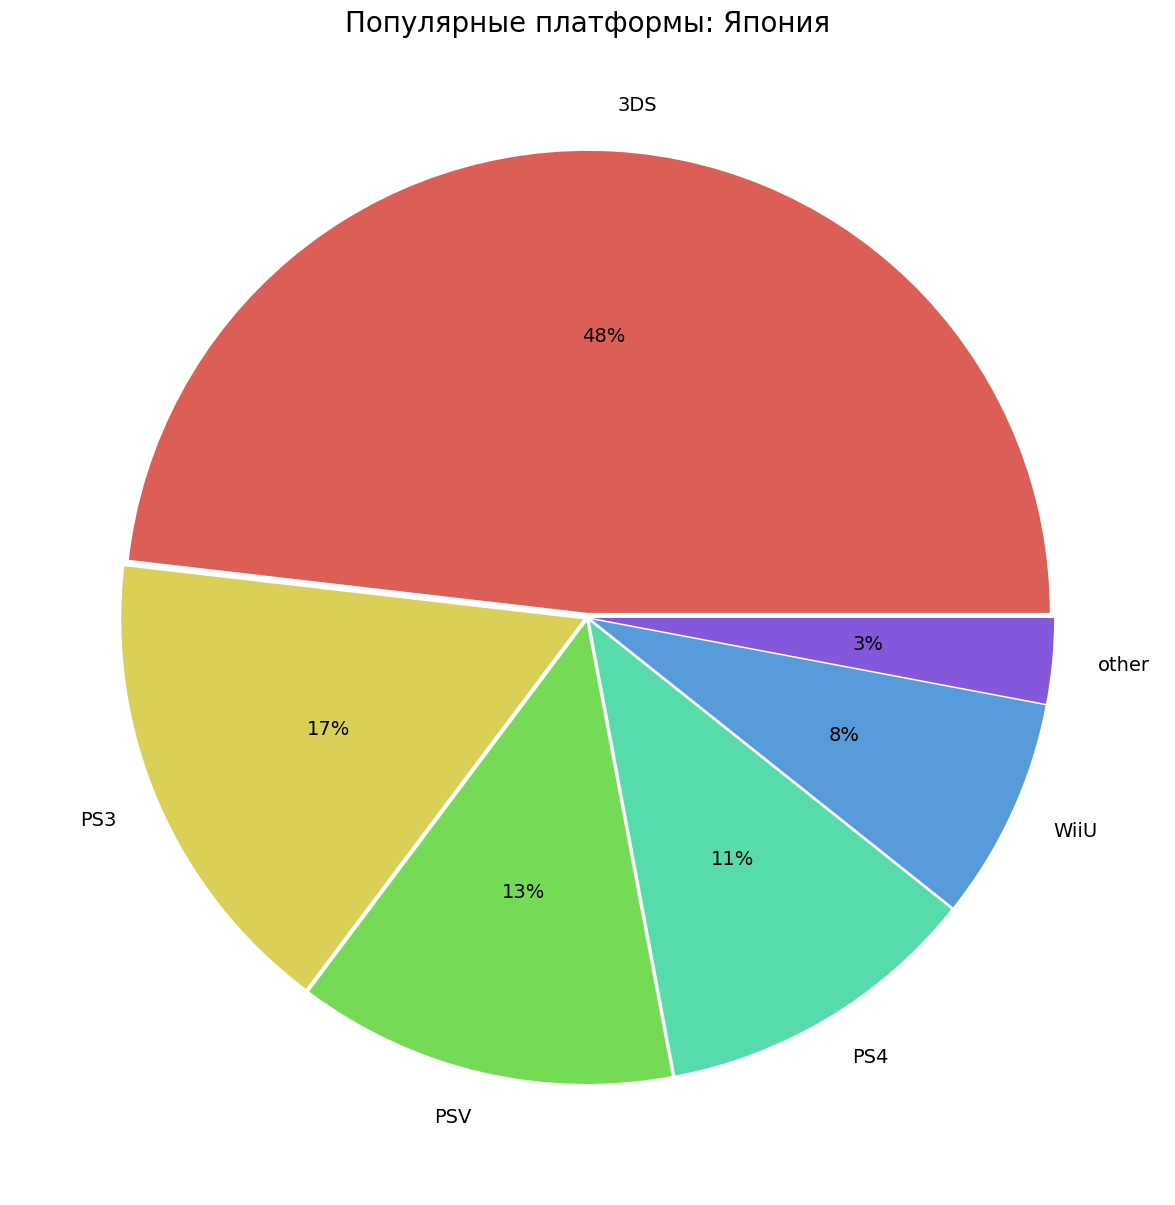

In [55]:
def group_out_of_top(x, platfom_top):
    if x in platfom_top:
        return x
    return 'other'

ntop = 5

for rg in regions.keys():
    sales = rg + '_sales'
    
    platfom_top = games_filtered.groupby('platform')[sales].sum().sort_values(ascending=False).index
    
    platfom_top = list(platfom_top)[:ntop]
    
    tmp = games_filtered.copy()
    
    tmp['platform'] = tmp['platform'].apply(group_out_of_top, args=[platfom_top])
    
    tmp = tmp.pivot_table(
        index='platform',
        values=sales,
        aggfunc='sum'
    ).reindex(
        platfom_top + ['other']
    )
       
    tmp.plot(
        kind='pie',
        y=sales,
        figsize=(15, 15),
        autopct='%.0f%%',
        explode=[0.01] * (ntop + 1),
        colors=sns.color_palette("hls", (ntop + 2)),
        textprops={'fontsize':14},
        legend=False
    )
    
    plt.title(f'Популярные платформы: {regions[rg]}', fontdict={"fontsize":20})
    plt.ylabel('')
    
    plt.show()

В Северной Америке Sony (PS3 + PS4) и Microsoft (Xbox 360 + Xbox One) занимают примерно по 40% рынка, доля Nintendo 3DS чуть больше 10%.

В Европе Sony (PS3 + PS4) занимает больше половины рынка, Microsoft (Xbox 360 + Xbox One) около четверти, доля Nintendo 3DS чуть меньше 10%.

В Японии рынок почти поровну поделён между Nintendo 3DS и платформами Sony Playstation.

Таким образом, нужны следующие акценты на платформы:
- Северная Америка - Xbox и Playstation
- Европа - Playstation и в меньшей степени Xbox
- Япония - Playstation и 3DS

Стоит отдельно отметить, что в Японии 60% рынка приходится на портативные консоли (3DS и PSV), в то время как в других регионах преобладаются станионарные устройства.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец, хорошее решение. 👍</font>

### Самые популярные жанры

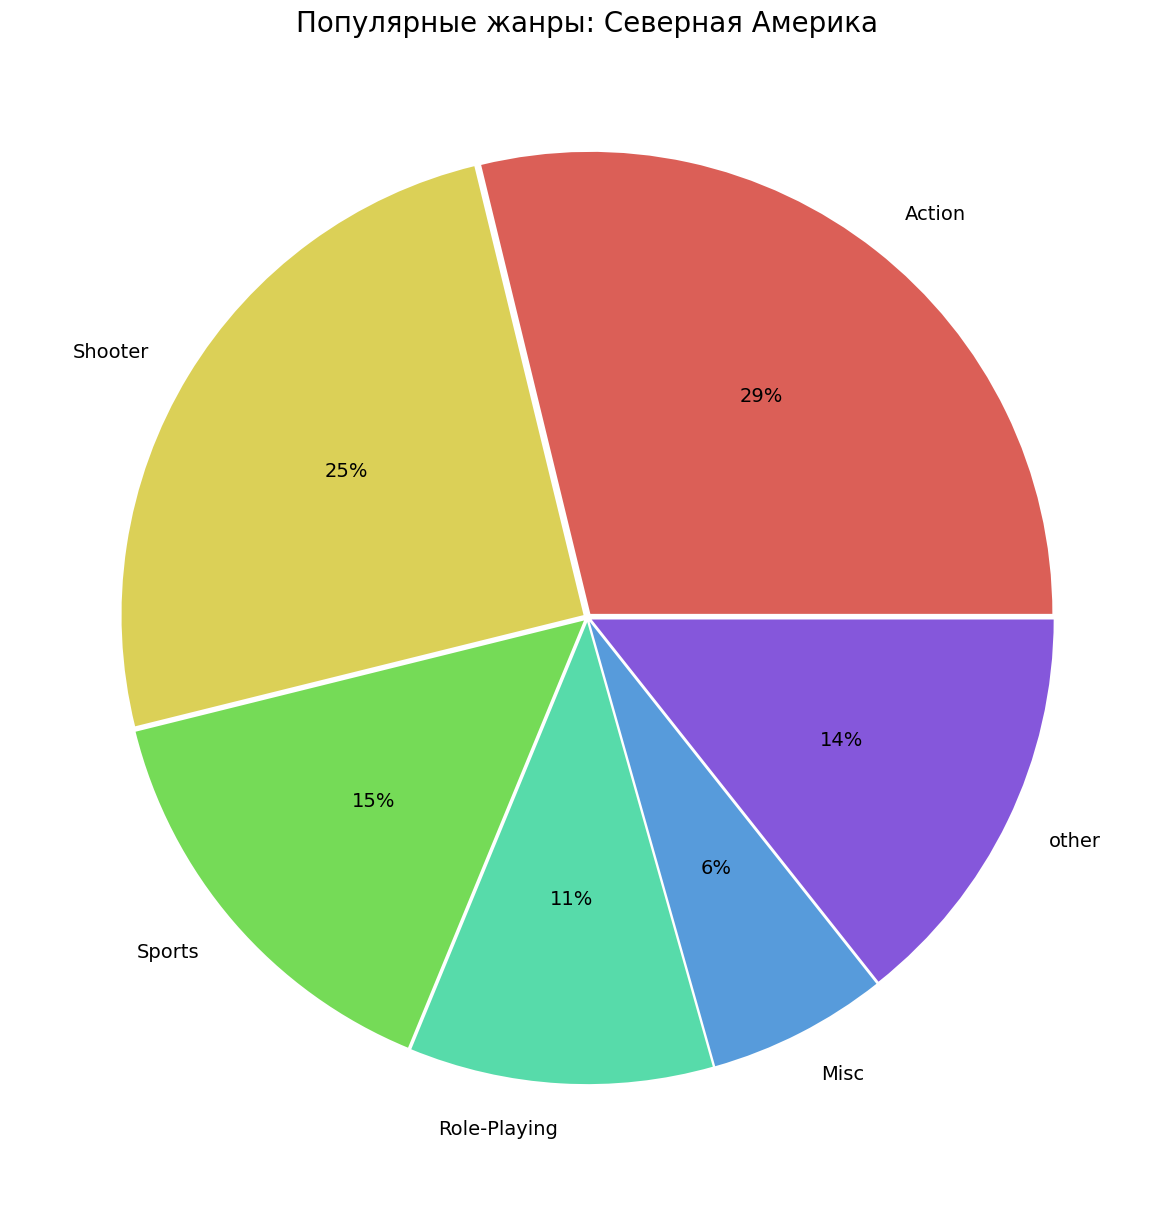

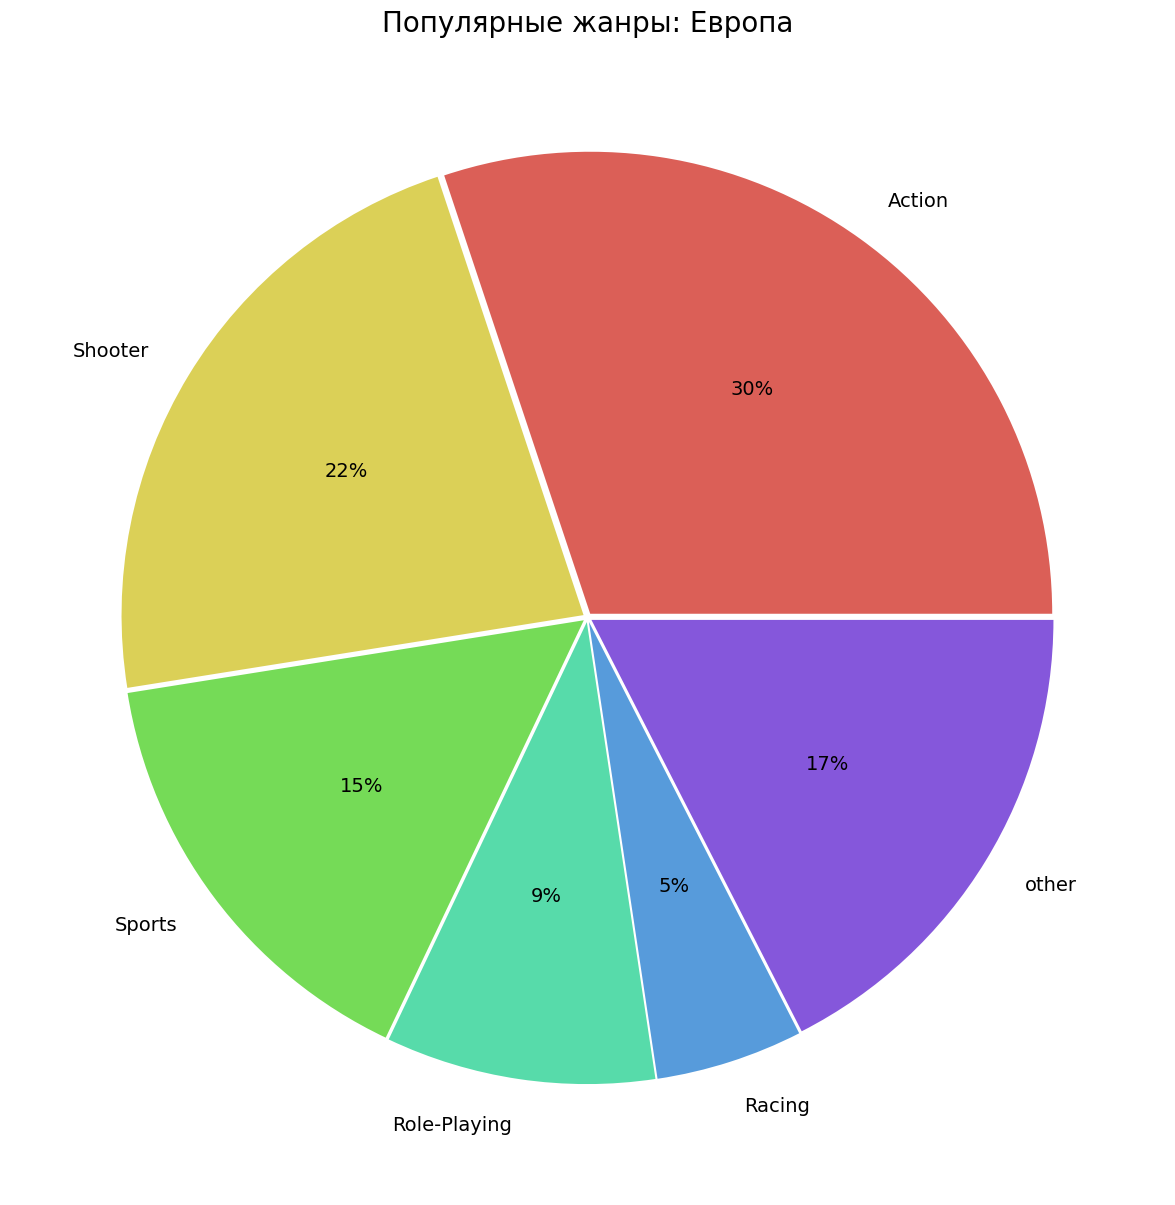

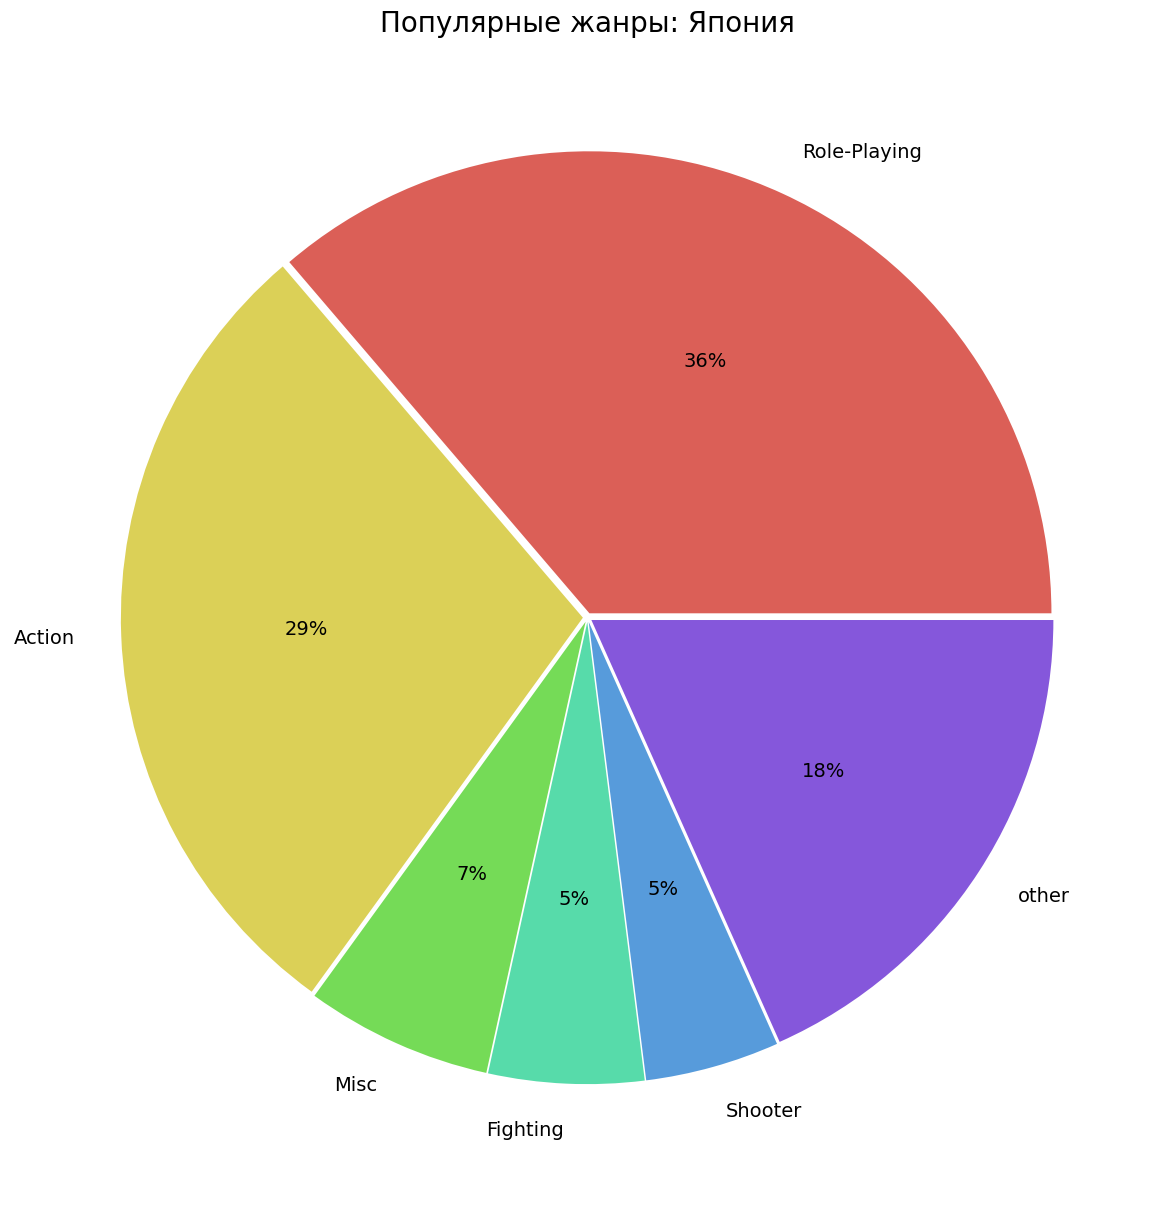

In [56]:
def group_out_of_top(x, genre_top):
    if x in genre_top:
        return x
    return 'other'

ntop = 5

for rg in regions.keys():
    sales = rg + '_sales'
    
    genre_top = games_filtered.groupby('genre')[sales].sum().sort_values(ascending=False).index
    
    genre_top = list(genre_top)[:ntop]
   
    tmp = games_filtered.copy()
    
    tmp['genre'] = tmp['genre'].apply(group_out_of_top, args=[genre_top])
    
    tmp = tmp.pivot_table(
        index='genre',
        values=sales,
        aggfunc='sum'
    ).reindex(
        genre_top + ['other']
    )
       
    tmp.plot(
        kind='pie',
        y=sales,
        figsize=(15, 15),
        autopct='%.0f%%',
        explode=[0.01] * (ntop + 1),
        colors=sns.color_palette("hls", (ntop + 2)),
        textprops={'fontsize':14},
        legend=False
        #normalize=True
    )
    
    plt.title(f'Популярные жанры: {regions[rg]}', fontdict={"fontsize":20})
    plt.ylabel('')
    
    plt.show()

Выводы:
- Северная Америка: лидеры - Shooter и Action, догоняющие - Sports и Role-Playing, данный топ-4 - 80% рынка
- Европа: практически идентично
- Япония: лидеры - Role-Playing и Action, дальше Misc(по сути тот же other) и пара догоняющих - Fighting и Shooter.

### Влияние рейтинг ESRB на продажи в отдельном регионе

,na_sales
rating,
M,165.21
N/A,89.42
E,79.05
E10+,54.24
T,49.79


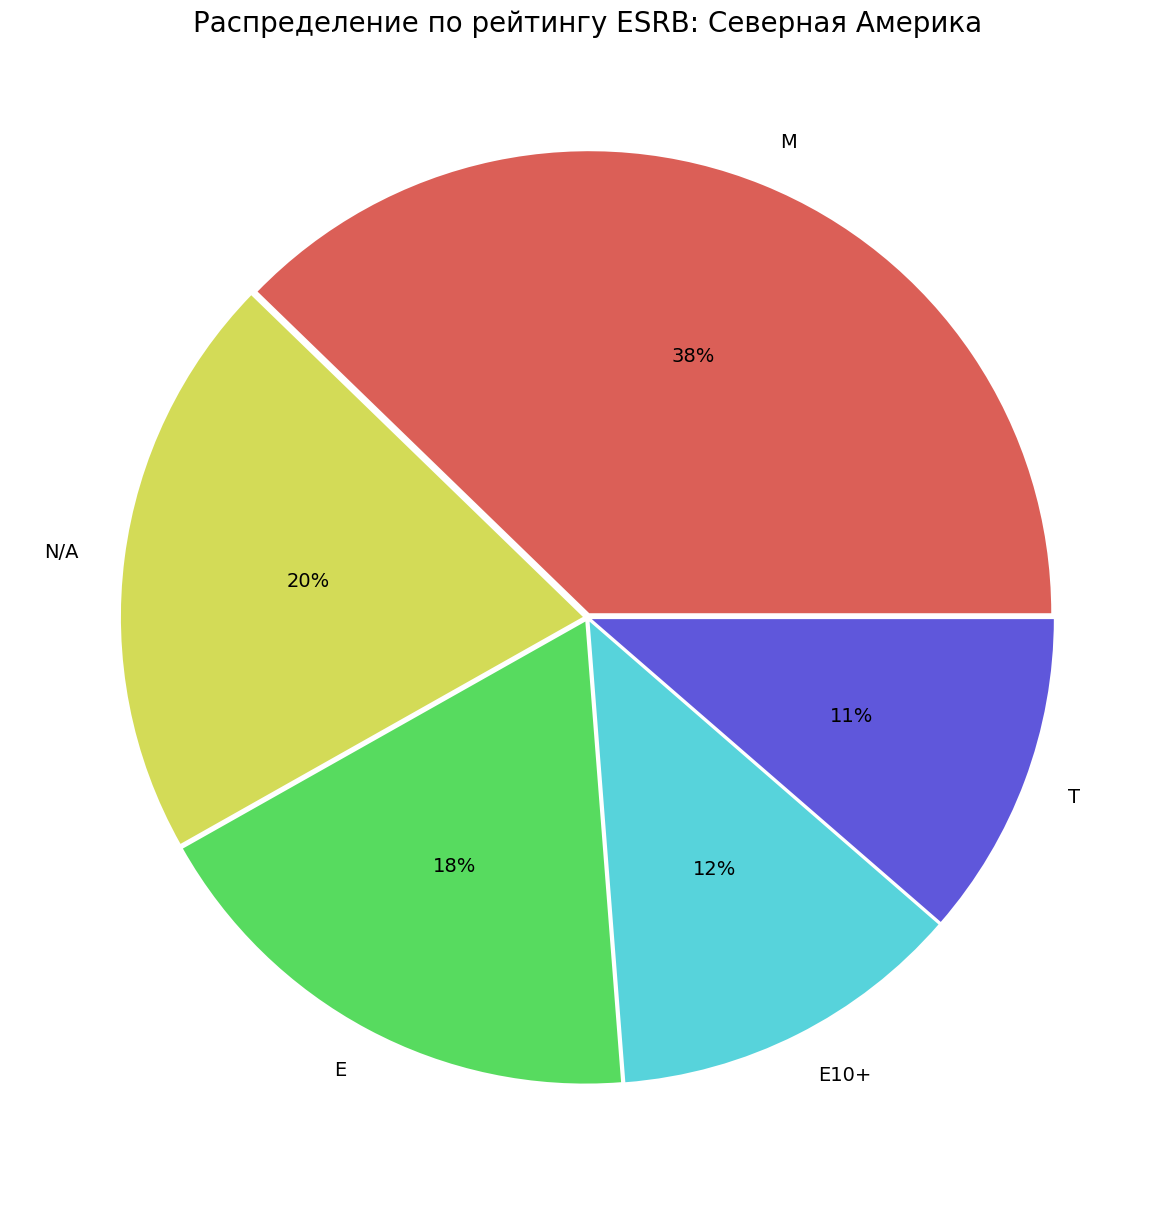

,eu_sales
rating,
M,145.32
E,83.36
N/A,78.91
E10+,42.69
T,41.95


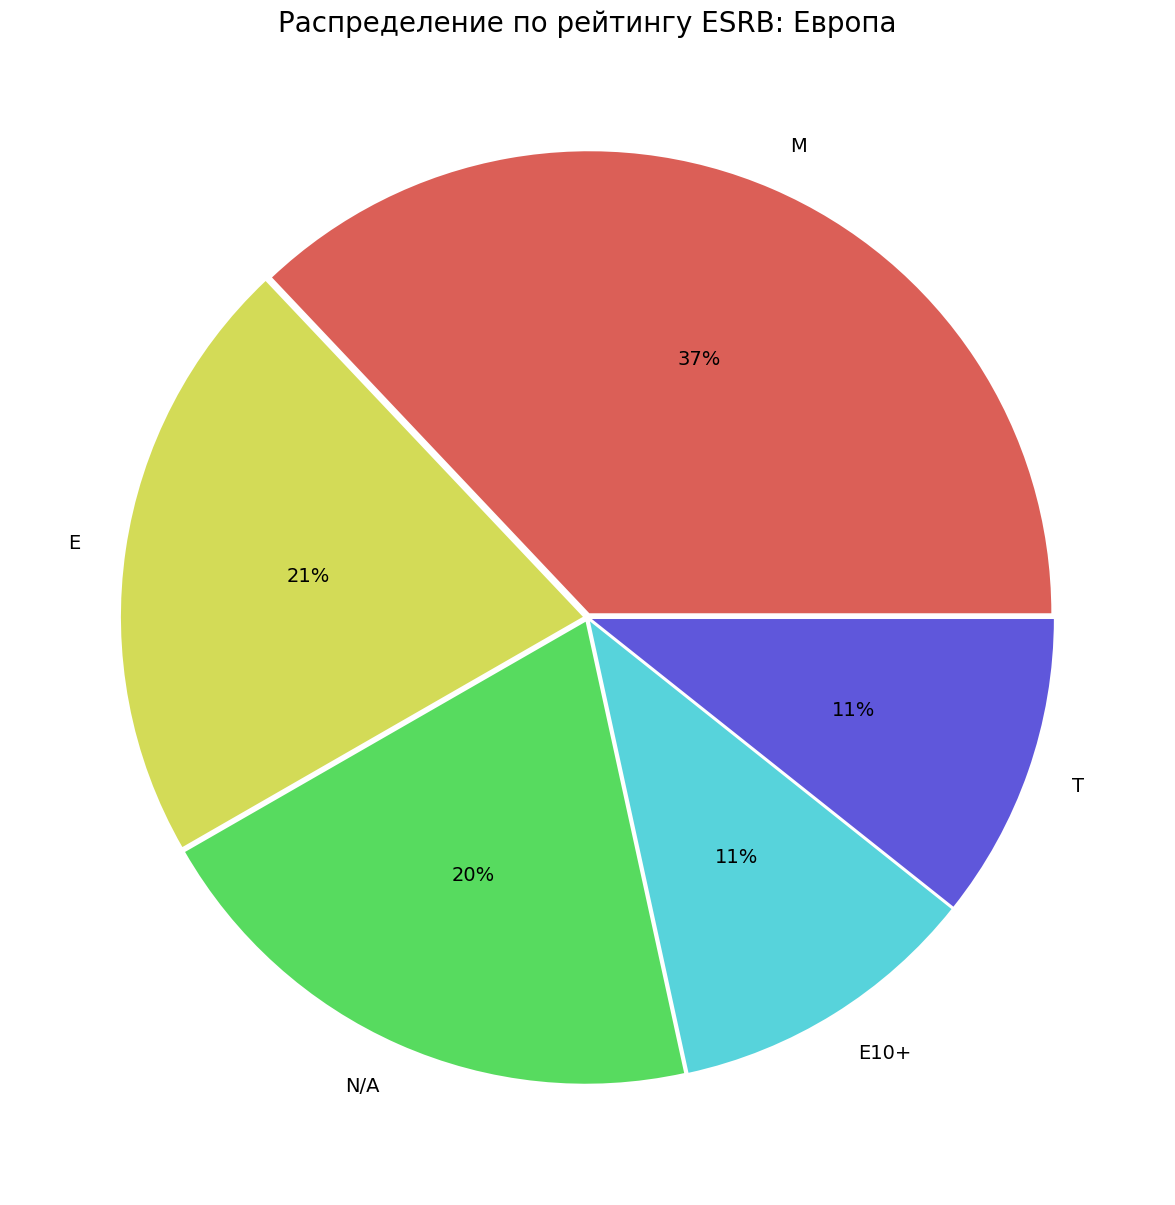

,jp_sales
rating,
N/A,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


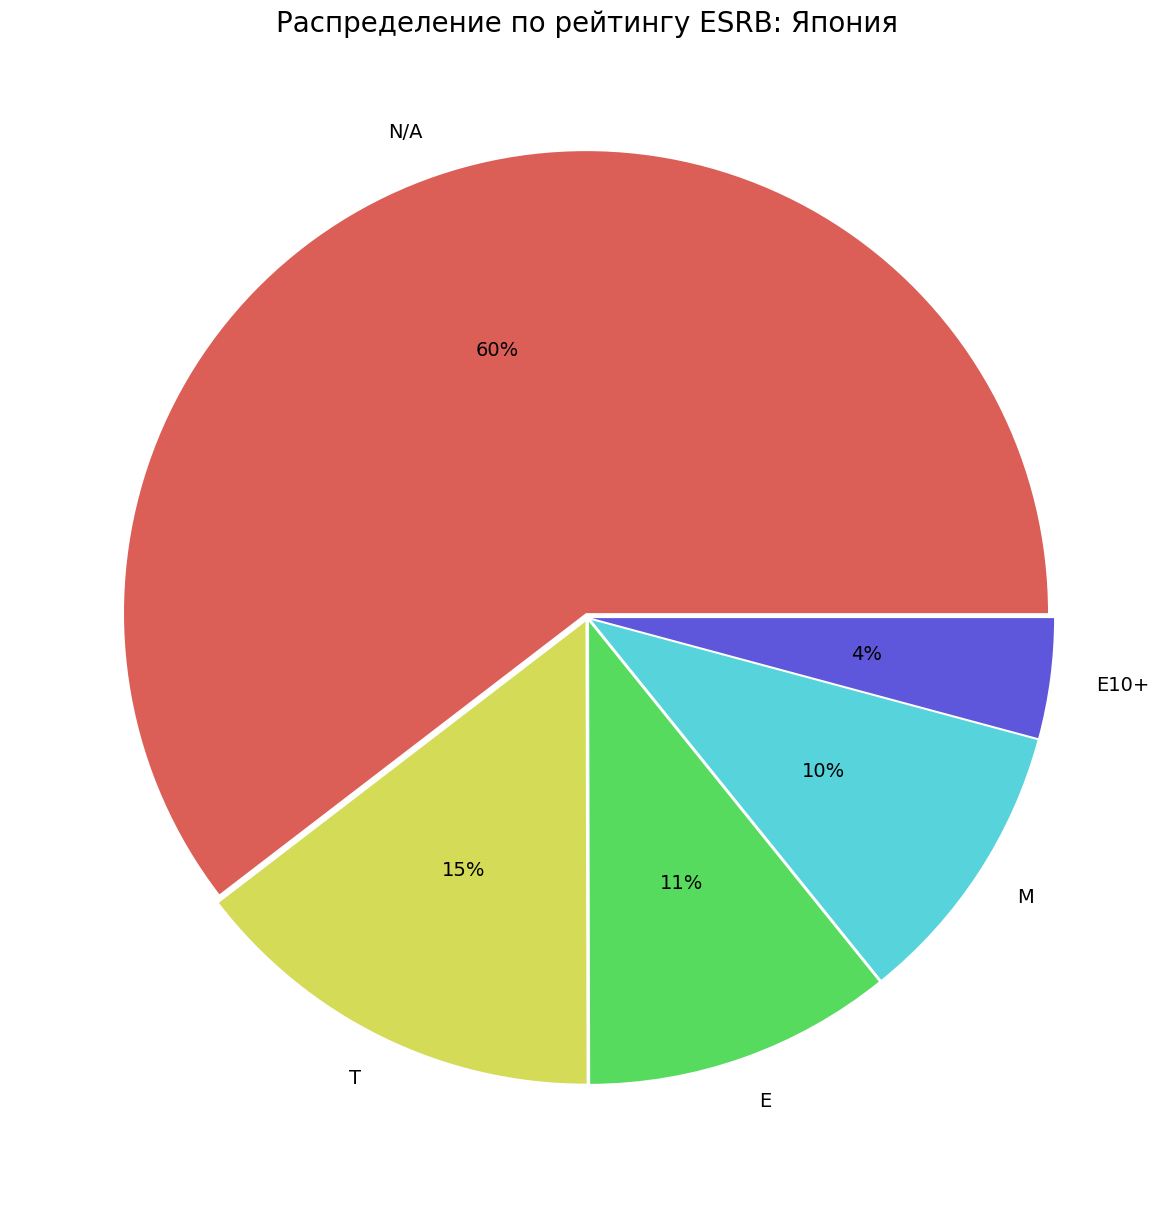

In [57]:
for rg in regions.keys():
    nrat = 5
    sales = rg + '_sales'
    
    tmp = games_filtered.pivot_table(
        index='rating',
        values=sales,
        aggfunc='sum'
    ).sort_values(
        by=sales,
        ascending=False
    )
    
    display(tmp)
    
    tmp[:nrat].plot(
        kind='pie',
        y=sales,
        figsize=(15, 15),
        autopct='%.0f%%',
        explode=[0.01] * nrat,
        colors=sns.color_palette("hls", nrat + 1),
        textprops={'fontsize':14},
        legend=False
    )
    
    plt.title(f'Распределение по рейтингу ESRB: {regions[rg]}', fontdict={"fontsize":20})
    plt.ylabel('')
    
    plt.show()

Выводы:
- Северная Америка: лидер - М, догоняющий Е, вместе они - почти 60%
- Европа:  практически идентично
- Япония: большинство игр без ESRB - для этого рынка на этот парметр можно не смотреть

## Проверка гипотез

Пороговым значением p-value примем 0.05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [58]:
user_score_pc = games_filtered.loc[games_filtered['platform'] == 'PC', 'user_score'].dropna()
user_score_xone = games_filtered.loc[games_filtered['platform'] == 'XOne', 'user_score'].dropna()

In [59]:
print('=== PC ==')
user_score_pc.describe()

=== PC ==


count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [60]:
print('=== Xbox One ===')
user_score_xone.describe()

=== Xbox One ===


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

H0 - cредние пользовательские рейтинги платформ Xbox One и PC **одинаковые**

H1 - cредние пользовательские рейтинги платформ Xbox One и PC **разные**

In [61]:
res = st.ttest_ind(
    user_score_pc,
    user_score_xone
)
print(f'p-value: {res.pvalue:.2f}')

p-value: 0.14


p-value значительно выше 0.05 - смело принимаем H0

### Средние пользовательские рейтинги жанров Action и Sports разные

In [62]:
user_score_action = games_filtered.loc[games_filtered['genre'] == 'Action', 'user_score'].dropna()
user_score_sports = games_filtered.loc[games_filtered['genre'] == 'Sports', 'user_score'].dropna()

In [63]:
print('=== Action ==')
user_score_action.describe()

=== Action ==


count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [64]:
print('=== Sports ==')
user_score_sports.describe()

=== Sports ==


count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

H0 - cредние пользовательские рейтинги жанров Action и Sports **одинаковые**

H1 - cредние пользовательские рейтинги жанров Action и Sports **разные**

Для удобства сделаем проверяумую гипотезу альтернативной, ибо она двухсторонняя

In [65]:
res = st.ttest_ind(
    user_score_action,
    user_score_sports
)
print(f'p-value: {res.pvalue:.2e}')

p-value: 1.05e-27


p-value на много порядков меньше 0.05 - отвергаем H0 и принимаем H1

### Итог

Обе проверяемые гипотезы были о равенстве средних двух генеральных совокупностей.
Это можно сделать с помощью scipy.stats.ttest_ind - Т-тест для двух независимых выборок.

Первая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" сразу может быть использована в качестве H0, а альтернавной ей является двухстороняя "Средние пользовательские рейтинги платформ Xbox One и PC разные"

Вторая гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" может быть взята в качестве двухсторонней H1 для гипотезы "Средние пользовательские рейтинги жанров Action и Sports одинаковые", которая удобна в качестве H0.

## Выводы

Данные хорошие - значимые количества пропусков только в тех данных, которые могут отсутствовать по разумным причинам.

Подборка за большой период времени позволяет увидеть динамику рынка видеоигр почти с его зарождения.
Это даёт возможность в том числе оценить срок жизни поколений игровых систем.

Информация о сроке жизни поколений позволяет оценить период актуальности информации о продажах и использовать в исследовании только эту наиболее репрезентативную часть данных.
Для прогнозирования на целевой 2017 такими данным можно считать информацию за период 2013-2016

Актуальными платформами на 2017 можно считать PS4, Xbox One и WiiU.

При сопоставлении продаж с оценками критиков и пользователей было установлено, что:
- оценки критиков положительно, но не очень сильно влияют на продажи
- оценки пользователей практически не влиюят на продажи для дольшинства платформ (исключение WiiU)

При анализе популярности разных жанров на глобальном рынке было установлено, что наиболее востребованы игры жанров Shooter, Sports и Platform.

При анализе популярности платформ на крупнейших рынках - Северная Америка, Европа и Япония - было установлено, что:
- в Северной Америке популярны Xbox и Playstation
- в Европе - Playstation и в меньшей степени Xbox
- в Японии - Playstation и 3DS

При анализе популярности разных жанров на крупнейших рынках было обнаружено, что:
- в Северной Америке и Европе популярны Action, Shooter и Sports
- в Японии с большим отрывом лидируют Role-Playing и Action

При анализе влияния рейтинга ESBR на крупнейших рынках было обнаружено, что:
- основные продажи (около 60%) в Северной Америке и Европе приходятся на M и E в соотношении 2:1.
- в Японии большнство продаваемых игр идут без ERSB - игноририуем его

Результаты проверки гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - принимаем
- Средние пользовательские рейтинги жанров Action и Sports одинаковые - отвергаем